<a href="https://colab.research.google.com/github/JeongYoon-L/Analysis-TMDB-open-data/blob/main/cse351_project_Lee_JeongYoon_114133199.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#JeongYoon Lee(114133199)_CSE351_Summer_project

- Project #1: Movie Revenue Prediction

In [72]:
#import libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from ast import literal_eval
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.preprocessing import MinMaxScaler
import scipy.stats as stats
import seaborn as sns
import scipy.stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [73]:
#read csv file
movies_original = pd.read_csv('tmdb_5000_movies.csv')
credits_original = pd.read_csv('tmdb_5000_credits.csv')



In [5]:
#check shape
movies_original.shape

(4803, 20)

In [7]:
#check shape
credits_original.shape

(4803, 4)

In [6]:
#check duplicated id
display(movies_original[movies_original.duplicated("id")])

Empty DataFrame
Columns: [budget, genres, homepage, id, keywords, original_language, original_title, overview, popularity, production_companies, production_countries, release_date, revenue, runtime, spoken_languages, status, tagline, title, vote_average, vote_count]
Index: []

In [9]:
#check duplicated id
display(credits_original[credits_original.duplicated("movie_id")])

Empty DataFrame
Columns: [movie_id, title, cast, crew]
Index: []

In [74]:
credits_original.rename(columns = {'movie_id' : 'id'}, inplace = True)
credits_original = credits_original.drop(columns = 'title')
credits_original.head()


id  ...                                               crew
0   19995  ...  [{"credit_id": "52fe48009251416c750aca23", "de...
1     285  ...  [{"credit_id": "52fe4232c3a36847f800b579", "de...
2  206647  ...  [{"credit_id": "54805967c3a36829b5002c41", "de...
3   49026  ...  [{"credit_id": "52fe4781c3a36847f81398c3", "de...
4   49529  ...  [{"credit_id": "52fe479ac3a36847f813eaa3", "de...

[5 rows x 3 columns]

In [75]:
movies_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [69]:
credits_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      4803 non-null   int64 
 1   cast    4803 non-null   object
 2   crew    4803 non-null   object
dtypes: int64(1), object(2)
memory usage: 112.7+ KB


In [76]:
#merge(left join) with two csv file
data = pd.merge(left = movies_original, right = credits_original, how = "left" , on = "id")
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [9]:
#check the number of null value for each columns.
data.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                       0
crew                       0
dtype: int64

In [77]:
#fill "NaN" to null value in homepage, overview, tagline columns
data["homepage"] = data["homepage"].fillna("NaN")
data["overview"] = data["overview"].fillna("NaN")
data["tagline"] = data["tagline"].fillna("NaN")

#check the number of null value for each columns.
data.isnull().sum()

budget                  0
genres                  0
homepage                0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            1
revenue                 0
runtime                 2
spoken_languages        0
status                  0
tagline                 0
title                   0
vote_average            0
vote_count              0
cast                    0
crew                    0
dtype: int64

In [78]:
data[data["release_date"].isnull()]

budget genres homepage      id  ... vote_average vote_count cast crew
4553       0     []      NaN  380097  ...          0.0          0   []   []

[1 rows x 22 columns]

When I searched this movie to the "themoviedb.org", and there's no such data for this movie.
So I decided remove this row since there are no any information about this movie in the website also any columns.


In [79]:
drop_row = data[data['release_date'].isnull()].index
data = data.drop( drop_row )
data[data["release_date"].isnull()]

Empty DataFrame
Columns: [budget, genres, homepage, id, keywords, original_language, original_title, overview, popularity, production_companies, production_countries, release_date, revenue, runtime, spoken_languages, status, tagline, title, vote_average, vote_count, cast, crew]
Index: []

In [88]:
runtime_null  = data[data["runtime"].isnull()]
runtime_null[['title','runtime']]

title  runtime
2656  Chiamatemi Francesco - Il Papa della gente      NaN
4140                 To Be Frank, Sinatra at 100      NaN

For the movie "Chiamatemi Francesco - Il Papa della gente" which its runtime is null value, we can find that the real runtime for this movie is 1h38m through the tmdb website.
https://www.themoviedb.org/movie/370980-chiamatemi-francesco


In [90]:
data.at[2656, 'runtime'] = 98
data.loc[2656]

budget                                                           15000000
genres                                      [{"id": 18, "name": "Drama"}]
homepage                                                              NaN
id                                                                 370980
keywords                [{"id": 717, "name": "pope"}, {"id": 5565, "na...
original_language                                                      it
original_title                 Chiamatemi Francesco - Il Papa della gente
overview                                                              NaN
popularity                                                       0.738646
production_companies               [{"name": "Taodue Film", "id": 45724}]
production_countries              [{"iso_3166_1": "IT", "name": "Italy"}]
release_date                                                   2015-12-03
revenue                                                                 0
runtime                               

In [91]:
data[data["runtime"].isnull()]

budget  ...                                               crew
4140       2  ...  [{"credit_id": "592b25e4c3a368783e065a2f", "de...

[1 rows x 22 columns]

For the movie "To Be Frank, Sinatra at 100" which its runtime is null value, we can find that the real runtime for this movie is 1h21m through the tmdb website. https://www.themoviedb.org/movie/459488-to-be-frank-sinatra-at-100

In [92]:
data.at[4140, 'runtime'] = 81
data.loc[4140]

budget                                                                  2
genres                                [{"id": 99, "name": "Documentary"}]
homepage                                                              NaN
id                                                                 459488
keywords                [{"id": 6027, "name": "music"}, {"id": 225822,...
original_language                                                      en
original_title                                To Be Frank, Sinatra at 100
overview                                                              NaN
popularity                                                       0.050625
production_companies     [{"name": "Eyeline Entertainment", "id": 60343}]
production_countries     [{"iso_3166_1": "GB", "name": "United Kingdom"}]
release_date                                                   2015-12-12
revenue                                                                 0
runtime                               

In [97]:
data[(data['title'] == "To Be Frank, Sinatra at 100") | (data['title'] == "Chiamatemi Francesco - Il Papa della gente")][['title','runtime']]

title  runtime
2656  Chiamatemi Francesco - Il Papa della gente     98.0
4140                 To Be Frank, Sinatra at 100     81.0

In [17]:
data[(data['revenue'] ==0)]

budget  ...                                               crew
83     27000000  ...  [{"credit_id": "52fe49e0c3a368484e145067", "de...
135   150000000  ...  [{"credit_id": "538aeb0a0e0a266718000fc2", "de...
265           0  ...  [{"credit_id": "52fe438d9251416c75014d95", "de...
309    84000000  ...  [{"credit_id": "52fe43439251416c75009b91", "de...
376    90000000  ...  [{"credit_id": "52fe435f9251416c7500dded", "de...
...         ...  ...                                                ...
4797          0  ...  [{"credit_id": "52fe475dc3a368484e0c319f", "de...
4799       9000  ...  [{"credit_id": "52fe487dc3a368484e0fb013", "de...
4800          0  ...  [{"credit_id": "52fe4df3c3a36847f8275ecf", "de...
4801          0  ...  [{"credit_id": "52fe4ad9c3a368484e16a36b", "de...
4802          0  ...  [{"credit_id": "58ce021b9251415a390165d9", "de...

[1426 rows x 22 columns]

- I found that almost dataset which have revenue as 0 value, don't have any information in the TMDB website.
- I think they have some problem while scrapping those data. It should be NaN instead of 0.
- For this analysis, the revenue will be very important features, so I will remove rows that has 0 revenue.


In [104]:
#############################Question!!!############################
data_revenue_zero = data[data['revenue']== 0].index
data_with_revenue = data.drop(data_revenue_zero)
data_with_revenue

budget  ...                                               crew
0     237000000  ...  [{"credit_id": "52fe48009251416c750aca23", "de...
1     300000000  ...  [{"credit_id": "52fe4232c3a36847f800b579", "de...
2     245000000  ...  [{"credit_id": "54805967c3a36829b5002c41", "de...
3     250000000  ...  [{"credit_id": "52fe4781c3a36847f81398c3", "de...
4     260000000  ...  [{"credit_id": "52fe479ac3a36847f813eaa3", "de...
...         ...  ...                                                ...
4775          0  ...  [{"credit_id": "52fe45309251416c9102a535", "de...
4788      12000  ...  [{"credit_id": "52fe426bc3a36847f801d203", "de...
4792      20000  ...  [{"credit_id": "52fe45cc9251416c9103eb7b", "de...
4796       7000  ...  [{"credit_id": "52fe45e79251416c75066791", "de...
4798     220000  ...  [{"credit_id": "52fe44eec3a36847f80b280b", "de...

[3376 rows x 22 columns]

In [102]:
data[['genres','keywords','production_companies', 'production_countries', 'spoken_languages','cast', 'crew']]

genres  ...                                               crew
0     [{"id": 28, "name": "Action"}, {"id": 12, "nam...  ...  [{"credit_id": "52fe48009251416c750aca23", "de...
1     [{"id": 12, "name": "Adventure"}, {"id": 14, "...  ...  [{"credit_id": "52fe4232c3a36847f800b579", "de...
2     [{"id": 28, "name": "Action"}, {"id": 12, "nam...  ...  [{"credit_id": "54805967c3a36829b5002c41", "de...
3     [{"id": 28, "name": "Action"}, {"id": 80, "nam...  ...  [{"credit_id": "52fe4781c3a36847f81398c3", "de...
4     [{"id": 28, "name": "Action"}, {"id": 12, "nam...  ...  [{"credit_id": "52fe479ac3a36847f813eaa3", "de...
...                                                 ...  ...                                                ...
4798  [{"id": 28, "name": "Action"}, {"id": 80, "nam...  ...  [{"credit_id": "52fe44eec3a36847f80b280b", "de...
4799  [{"id": 35, "name": "Comedy"}, {"id": 10749, "...  ...  [{"credit_id": "52fe487dc3a368484e0fb013", "de...
4800  [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...  ...  [{"credit_id": "52fe4df3c3a36847f8275ecf", "de...
4801                                                 []  ...  [{"credit_id": "52fe4ad9c3a368484e16a36b", "de...
4802                [{"id": 99, "name": "Documentary"}]  ...  [{"credit_id": "58ce021b9251415a390165d9", "de...

[4802 rows x 7 columns]

In [105]:
#make dict to list
data_with_revenue['genres']=data_with_revenue['genres'].apply(literal_eval)
data_with_revenue['genres']=data_with_revenue['genres'].apply(lambda x : [y['name'] for y in x] )

data_with_revenue['keywords']=data_with_revenue['keywords'].apply(literal_eval)
data_with_revenue['keywords']=data_with_revenue['keywords'].apply(lambda x : [y['name'] for y in x] )

data_with_revenue['production_companies']=data_with_revenue['production_companies'].apply(literal_eval)
data_with_revenue['production_companies']=data_with_revenue['production_companies'].apply(lambda x : [y['name'] for y in x] )

data_with_revenue['production_countries']=data_with_revenue['production_countries'].apply(literal_eval)
data_with_revenue['production_countries']=data_with_revenue['production_countries'].apply(lambda x : [y['name'] for y in x] )

data_with_revenue['spoken_languages']=data_with_revenue['spoken_languages'].apply(literal_eval)
data_with_revenue['spoken_languages']=data_with_revenue['spoken_languages'].apply(lambda x : [y['iso_639_1'] for y in x] )

data_with_revenue['cast']=data_with_revenue['cast'].apply(literal_eval)
data_with_revenue['cast']=data_with_revenue['cast'].apply(lambda x : [y['name'] for y in x] )

data_with_revenue['crew']=data_with_revenue['crew'].apply(literal_eval)
data_with_revenue['crew']=data_with_revenue['crew'].apply(lambda x : [y['name'] for y in x] )

In [106]:
data_with_revenue[['genres','keywords','production_companies', 'production_countries', 'spoken_languages','cast', 'crew']]

genres  ...                                               crew
0     [Action, Adventure, Fantasy, Science Fiction]  ...  [Stephen E. Rivkin, Rick Carter, Christopher B...
1                      [Adventure, Fantasy, Action]  ...  [Dariusz Wolski, Gore Verbinski, Jerry Bruckhe...
2                        [Action, Adventure, Crime]  ...  [Thomas Newman, Sam Mendes, Anna Pinnock, John...
3                  [Action, Crime, Drama, Thriller]  ...  [Hans Zimmer, Charles Roven, Christopher Nolan...
4              [Action, Adventure, Science Fiction]  ...  [Andrew Stanton, Andrew Stanton, John Lasseter...
...                                             ...  ...                                                ...
4775                                [Drama, Comedy]  ...     [Andrew Bujalski, Andrew Bujalski, Ethan Vogt]
4788                        [Horror, Comedy, Crime]  ...  [John Waters, John Waters, John Waters, John W...
4792             [Crime, Horror, Mystery, Thriller]  ...               [Kiyoshi Kurosawa, Kiyoshi Kurosawa]
4796             [Science Fiction, Drama, Thriller]  ...  [Shane Carruth, Shane Carruth, Shane Carruth, ...
4798                      [Action, Crime, Thriller]  ...  [Robert Rodriguez, Robert Rodriguez, Robert Ro...

[3376 rows x 7 columns]

In [23]:
data_with_revenue.head()

budget  ...                                               crew
0  237000000  ...  [Stephen E. Rivkin, Rick Carter, Christopher B...
1  300000000  ...  [Dariusz Wolski, Gore Verbinski, Jerry Bruckhe...
2  245000000  ...  [Thomas Newman, Sam Mendes, Anna Pinnock, John...
3  250000000  ...  [Hans Zimmer, Charles Roven, Christopher Nolan...
4  260000000  ...  [Andrew Stanton, Andrew Stanton, John Lasseter...

[5 rows x 22 columns]

In [107]:
data_with_revenue['num_of_genres'] = data_with_revenue["genres"].apply(lambda x: len(x) if x != {} else 0)
data_with_revenue['num_of_keywords'] = data_with_revenue["keywords"].apply(lambda x: len(x) if x != {} else 0)
data_with_revenue['num_of_production_companies'] = data_with_revenue["production_companies"].apply(lambda x: len(x) if x != {} else 0)
data_with_revenue['num_of_production_countries'] = data_with_revenue["production_countries"].apply(lambda x: len(x) if x != {} else 0)
data_with_revenue['num_of_spoken_languages'] = data_with_revenue["spoken_languages"].apply(lambda x: len(x) if x != {} else 0)
data_with_revenue['num_of_cast'] = data_with_revenue["cast"].apply(lambda x: len(x) if x != {} else 0)
data_with_revenue['num_of_crew'] = data_with_revenue["crew"].apply(lambda x: len(x) if x != {} else 0)

data_with_revenue.head()

budget  ... num_of_crew
0  237000000  ...         153
1  300000000  ...          32
2  245000000  ...         155
3  250000000  ...         217
4  260000000  ...         132

[5 rows x 29 columns]

In [21]:
####################################Question!###########################
data_with_revenue[(data_with_revenue['num_of_genres'] ==0) | (data_with_revenue['num_of_keywords'] ==0) |(data_with_revenue['num_of_production_companies'] ==0) |	(data_with_revenue['num_of_production_countries'] ==0) |	(data_with_revenue['num_of_spoken_languages'] ==0) |	(data_with_revenue['num_of_cast']==0) |	(data_with_revenue['num_of_crew']==0)]

budget                        genres  ... num_of_cast  num_of_crew
71    145000000  [Adventure, Action, Fantasy]  ...          15           17
272    90000000             [Comedy, Romance]  ...          10            3
323   100000000      [Comedy, Drama, Romance]  ...          32           14
381    90000000     [Fantasy, Action, Family]  ...          12            3
436    80000000                      [Comedy]  ...          55           17
...         ...                           ...  ...         ...          ...
4641        250    [Drama, Comedy, Animation]  ...           3            2
4661     245000         [Drama, Romance, War]  ...          11           10
4668     100000                      [Comedy]  ...          15            1
4772      31192       [Drama, Action, Comedy]  ...           9            3
4775          0               [Drama, Comedy]  ...          15            3

[147 rows x 29 columns]

In [108]:
data_with_revenue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3376 entries, 0 to 4798
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   budget                       3376 non-null   int64  
 1   genres                       3376 non-null   object 
 2   homepage                     3376 non-null   object 
 3   id                           3376 non-null   int64  
 4   keywords                     3376 non-null   object 
 5   original_language            3376 non-null   object 
 6   original_title               3376 non-null   object 
 7   overview                     3376 non-null   object 
 8   popularity                   3376 non-null   float64
 9   production_companies         3376 non-null   object 
 10  production_countries         3376 non-null   object 
 11  release_date                 3376 non-null   object 
 12  revenue                      3376 non-null   int64  
 13  runtime           

#Count the number of movies released by day of week, month and year, are there any patterns that you observe?

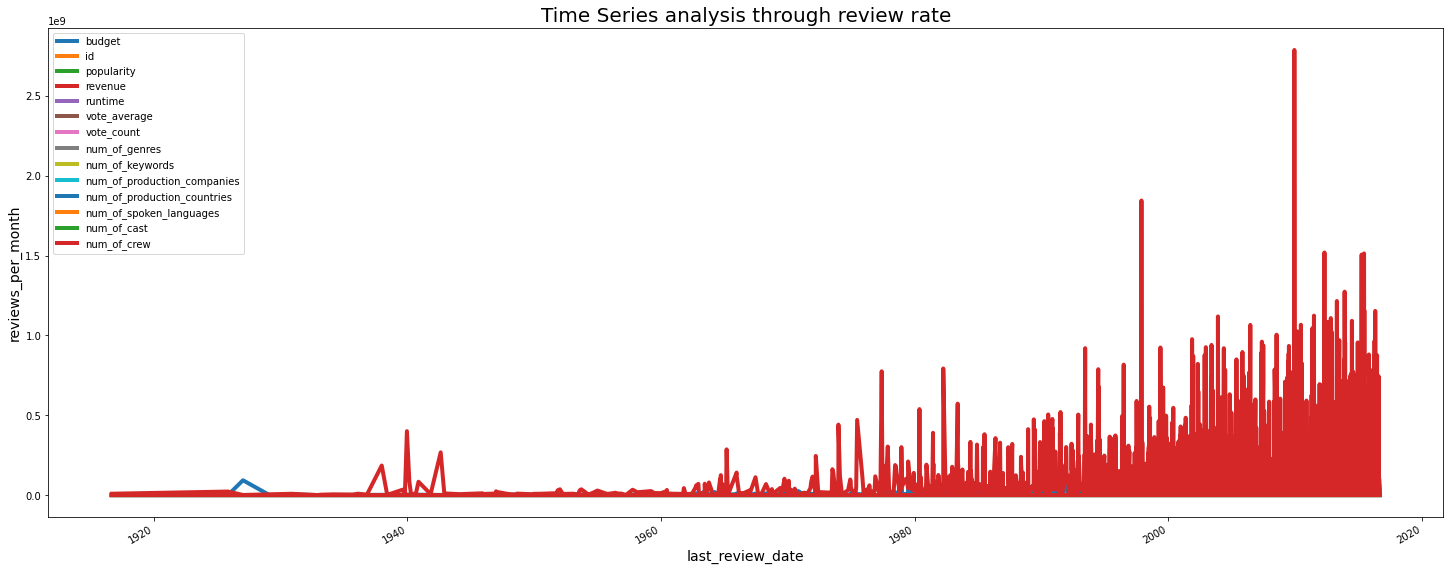

In [32]:
###################################################삭제#####################################
data_day = data_with_revenue.copy()

data_day1 = data_with_revenue.copy()

data_day = pd.to_datetime(data_day['release_date'])
datetime_index = pd.DatetimeIndex(data_day.values)
data_day = data_day1.set_index(datetime_index)


data_day.plot(figsize = (25,10),linewidth = 4)

plt.title('Time Series analysis through review rate', fontsize=20)

plt.xlabel('last_review_date', fontsize=14)

plt.ylabel('reviews_per_month', fontsize=14)

plt.show()

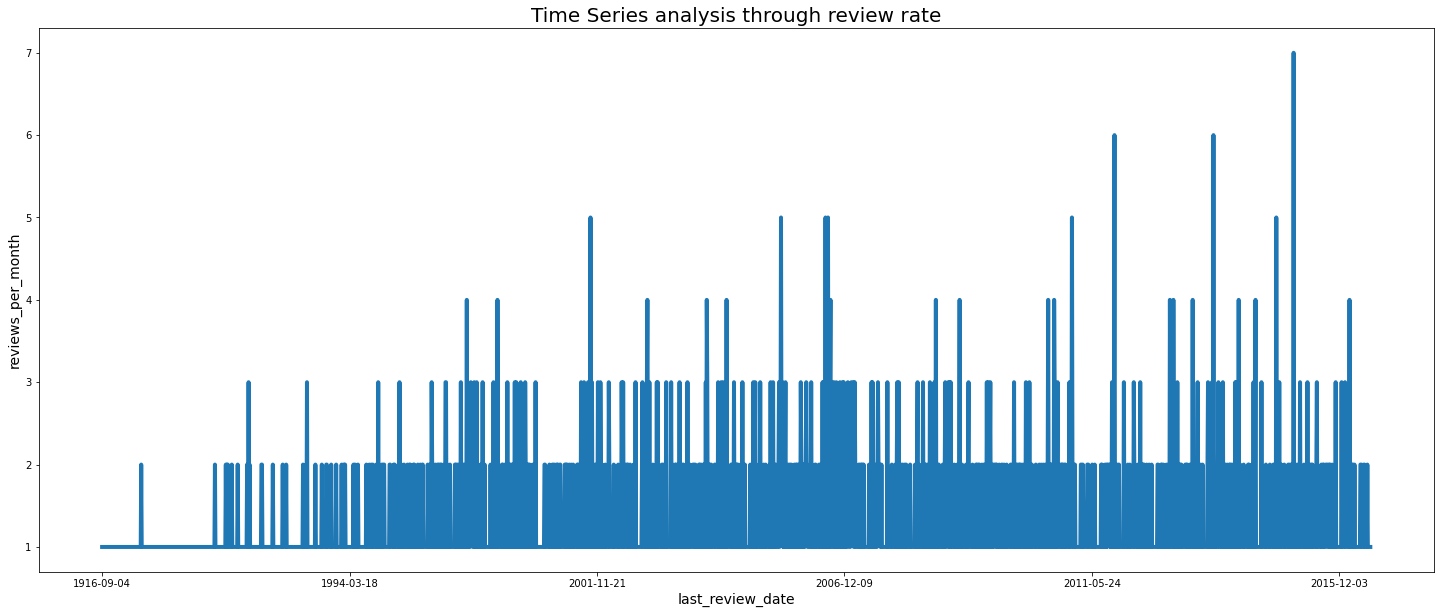

In [79]:
data_day = data_with_revenue.copy()
data_day = data_day.groupby(['release_date']).size()
data_day

data_day.plot(figsize = (25,10),linewidth = 4)
plt.title('Time Series analysis through review rate', fontsize=20)

plt.xlabel('last_review_date', fontsize=14)

plt.ylabel('reviews_per_month', fontsize=14)

plt.show()

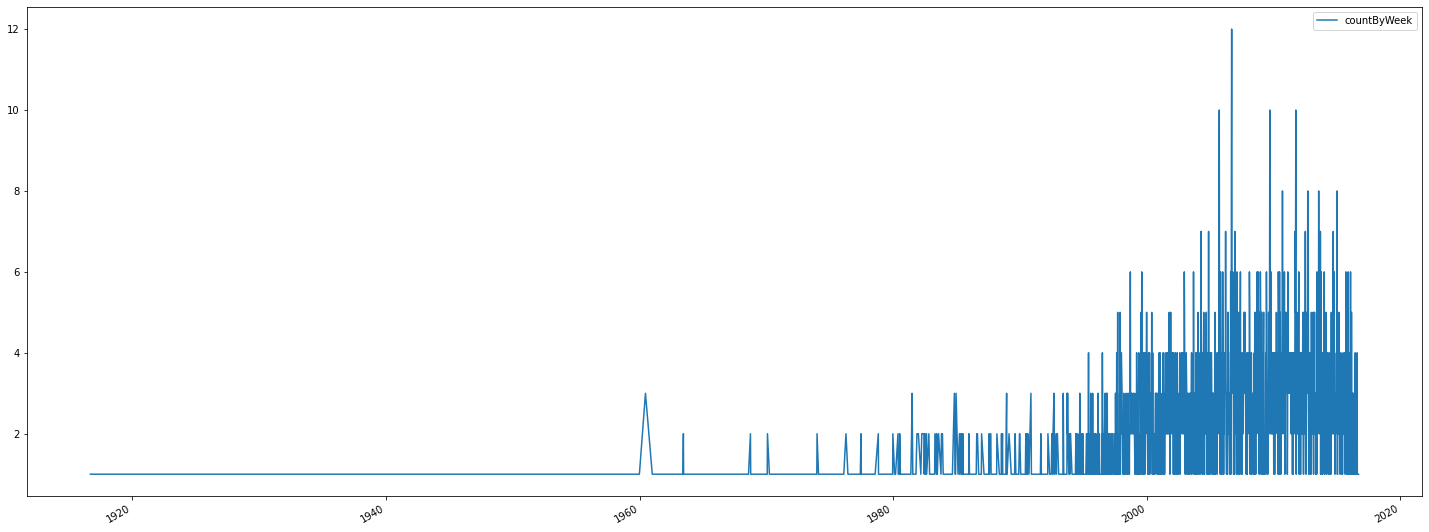

In [80]:
data_day = data_with_revenue.copy()
data_day = data_day.groupby(['release_date']).size()

data_day = pd.DataFrame(data_day, columns=['countByWeek'])
df_time = pd.to_datetime(data_day.index)
datetime_index = pd.DatetimeIndex(df_time.values) 
data_day = data_day.set_index(datetime_index)

data_day
#Resample the dataframe
data_day = data_day.resample('1W').sum()

drop_row_week = data_day[data_day['countByWeek']==0].index
data_day = data_day.drop( drop_row_week )

data_day
#You can plot the chart by adding .plot()
# data_day.plot(kind = 'bar' ,figsize = (25,10))
data_day.plot(figsize = (25,10))


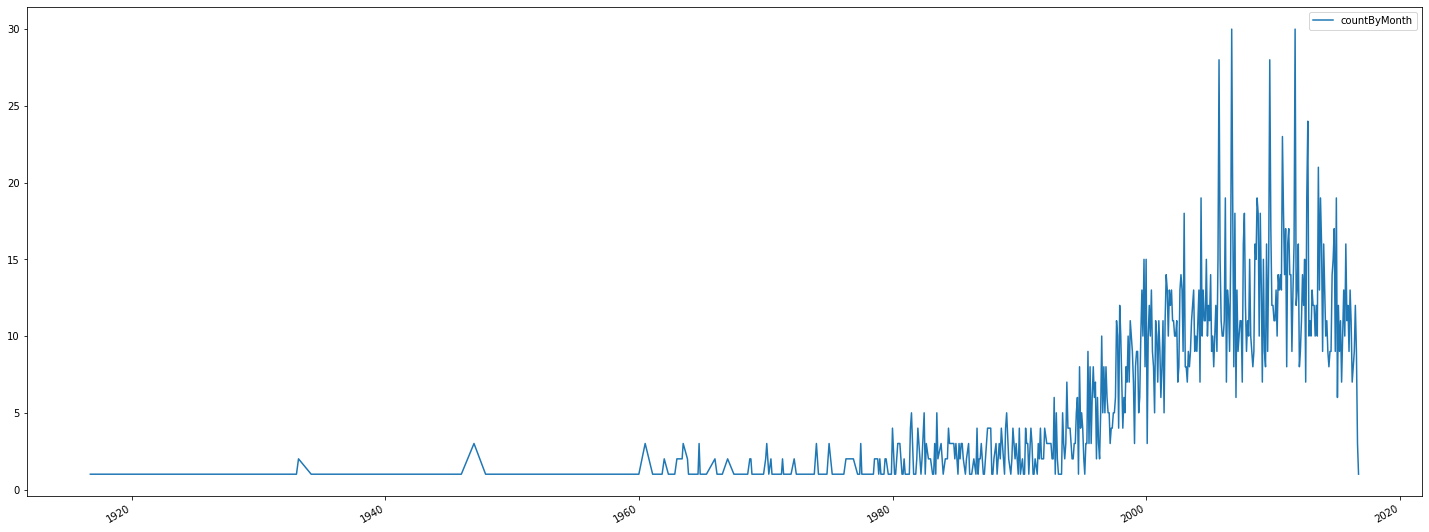

In [86]:
data_day = data_with_revenue.copy()
data_day = data_day.groupby(['release_date']).size()

data_day = pd.DataFrame(data_day, columns=['countByMonth'])
df_time = pd.to_datetime(data_day.index)
datetime_index = pd.DatetimeIndex(df_time.values) 
data_day = data_day.set_index(datetime_index)

data_day
#Resample the dataframe
data_day = data_day.resample('1M').sum()

drop_row_week = data_day[data_day['countByMonth']==0].index
data_day = data_day.drop( drop_row_week )

data_day
#You can plot the chart by adding .plot()
# data_day.plot(kind = 'bar' ,figsize = (25,10))
data_day.plot(figsize = (25,10))


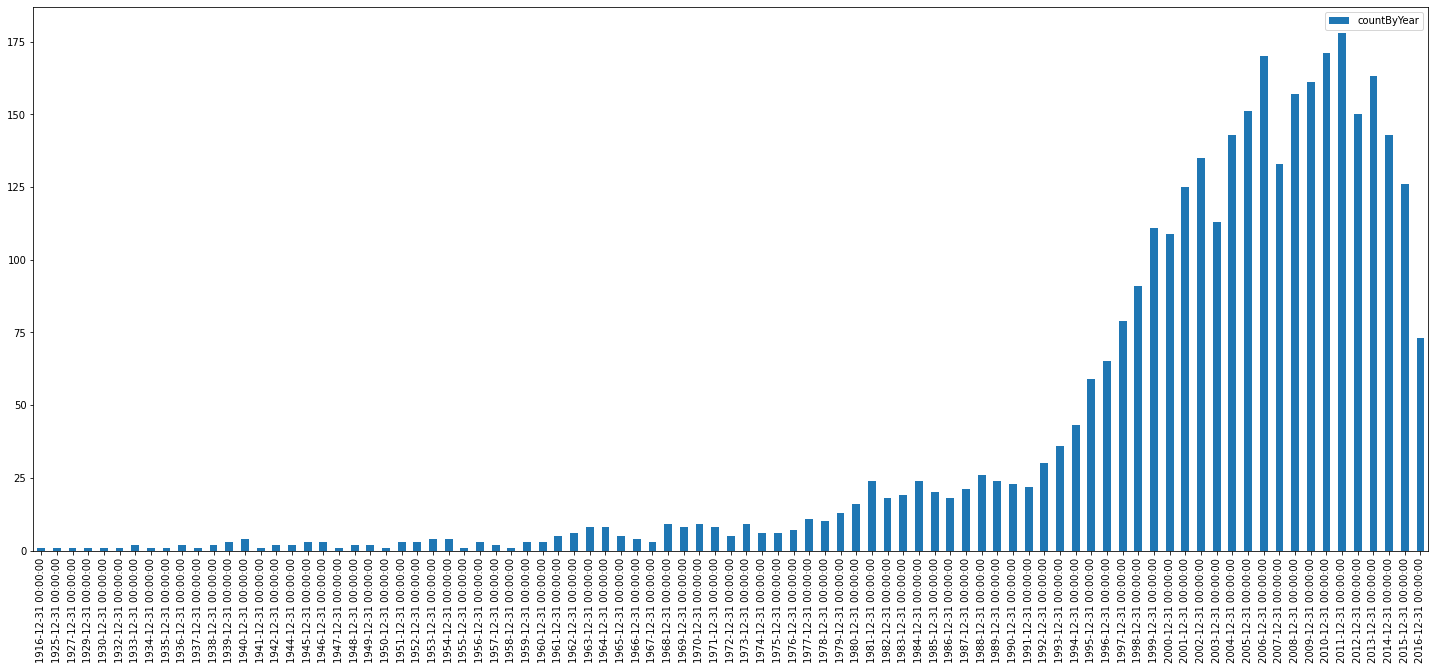

In [85]:
data_day = data_with_revenue.copy()
data_day = data_day.groupby(['release_date']).size()

data_day = pd.DataFrame(data_day, columns=['countByYear'])
df_time = pd.to_datetime(data_day.index)
datetime_index = pd.DatetimeIndex(df_time.values) 
data_day = data_day.set_index(datetime_index)

data_day
#Resample the dataframe
data_day = data_day.resample('1Y').sum()

drop_row_week = data_day[data_day['countByYear']==0].index
data_day = data_day.drop( drop_row_week )

data_day
#You can plot the chart by adding .plot()
data_day.plot(kind = 'bar' ,figsize = (25,10))
# data_day.plot(figsize = (25,10))


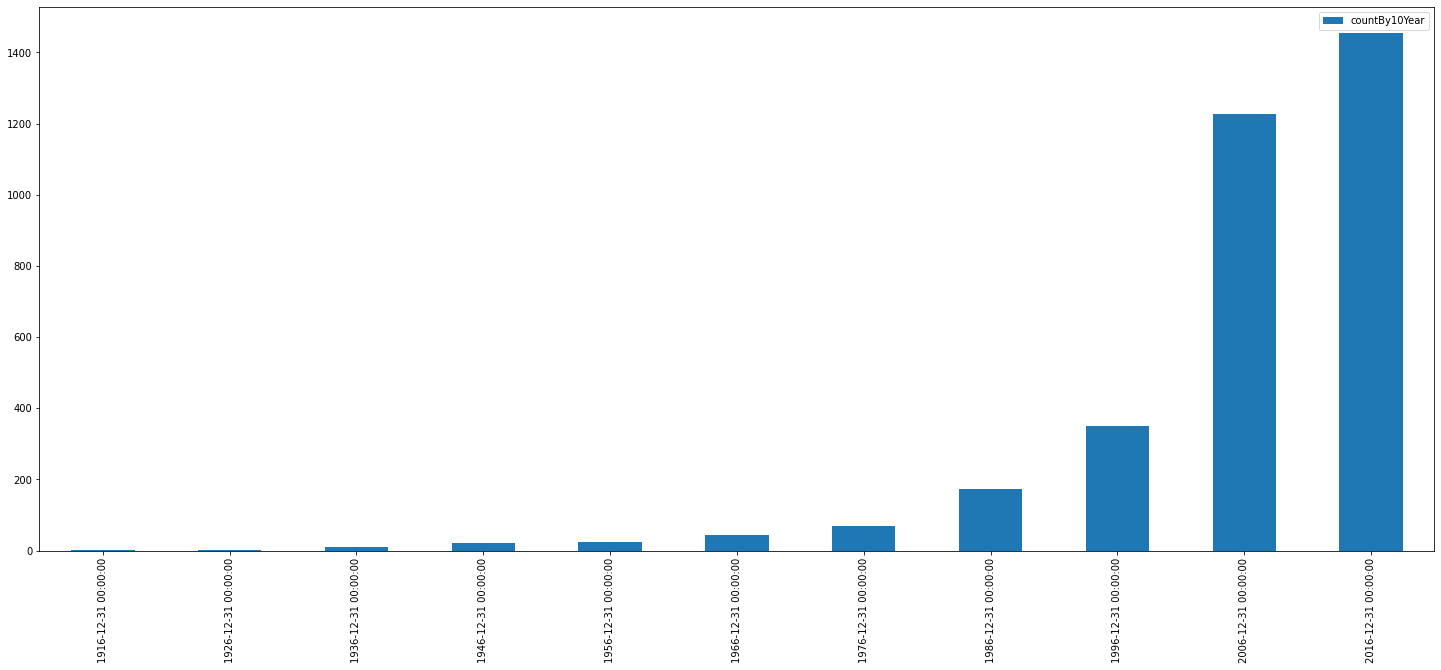

In [87]:
data_day = data_with_revenue.copy()
data_day = data_day.groupby(['release_date']).size()

data_day = pd.DataFrame(data_day, columns=['countBy10Year'])
df_time = pd.to_datetime(data_day.index)
datetime_index = pd.DatetimeIndex(df_time.values) 
data_day = data_day.set_index(datetime_index)

data_day
#Resample the dataframe
data_day = data_day.resample('10Y').sum()

drop_row_week = data_day[data_day['countBy10Year']==0].index
data_day = data_day.drop( drop_row_week )

data_day
#You can plot the chart by adding .plot()
data_day.plot(kind = 'bar' ,figsize = (25,10))
# data_day.plot(figsize = (25,10))


In [22]:
genre_1910 = data_with_revenue[data_with_revenue['release_date'].str.startswith("191")]
genre_1920 = data_with_revenue[data_with_revenue['release_date'].str.startswith("192")]
genre_1930 = data_with_revenue[data_with_revenue['release_date'].str.startswith("193")]
genre_1940 = data_with_revenue[data_with_revenue['release_date'].str.startswith("194")]
genre_1950 = data_with_revenue[data_with_revenue['release_date'].str.startswith("195")]
genre_1960 = data_with_revenue[data_with_revenue['release_date'].str.startswith("196")]
genre_1970 = data_with_revenue[data_with_revenue['release_date'].str.startswith("197")]
genre_1980 = data_with_revenue[data_with_revenue['release_date'].str.startswith("198")]
genre_1990 = data_with_revenue[data_with_revenue['release_date'].str.startswith("199")]
genre_2000 = data_with_revenue[data_with_revenue['release_date'].str.startswith("200")]
genre_2010 = data_with_revenue[data_with_revenue['release_date'].str.startswith("201")]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


(-0.5, 1199.5, 999.5, -0.5)

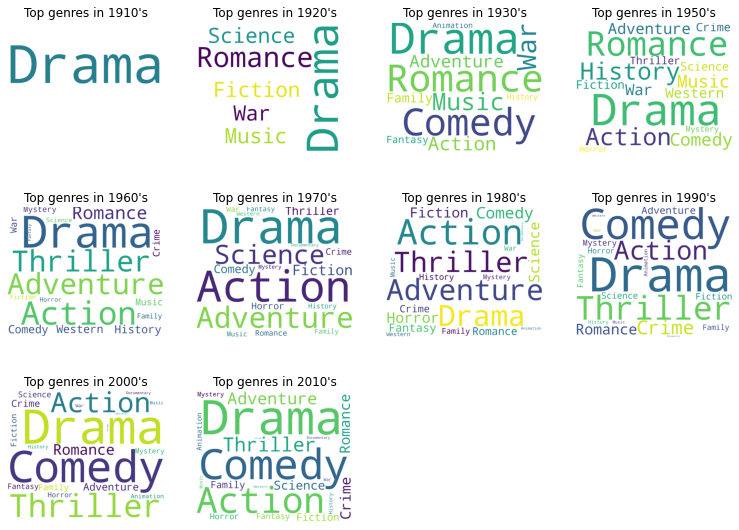

In [191]:
fig=plt.figure(figsize = (13,13))
rows = 4
cols = 4
axes=[]


list_of_genre_1910 = list(genre_1910["genres"])
text = " ".join([i for j in list_of_genre_1910 for i in j])
word_cloud = WordCloud(max_font_size = None, background_color = "white", collocations = False,\
                       width = 1200, height = 1000).generate(text)
plt1 = fig.add_subplot(rows,cols, 1)
plt1.imshow(word_cloud) 
plt1.set_title("Top genres in 1910's") 
plt1.axis("off") 

list_of_genre_1920 = list(genre_1920["genres"])
text = " ".join([i for j in list_of_genre_1920 for i in j])
word_cloud = WordCloud(max_font_size = None, background_color = "white", collocations = False,\
                       width = 1200, height = 1000).generate(text)
plt1 = fig.add_subplot(rows,cols, 2)
plt1.imshow(word_cloud) 
plt1.set_title("Top genres in 1920's") 
plt1.axis("off") 

list_of_genre_1930 = list(genre_1930["genres"])
text = " ".join([i for j in list_of_genre_1930 for i in j])
word_cloud = WordCloud(max_font_size = None, background_color = "white", collocations = False,\
                       width = 1200, height = 1000).generate(text)
plt1 = fig.add_subplot(rows,cols, 3)
plt1.imshow(word_cloud) 
plt1.set_title("Top genres in 1930's") 
plt1.axis("off") 

list_of_genre_1940 = list(genre_1940["genres"])
text = " ".join([i for j in list_of_genre_1940 for i in j])
word_cloud = WordCloud(max_font_size = None, background_color = "white", collocations = False,\
                       width = 1200, height = 1000).generate(text)
plt1 = fig.add_subplot(rows,cols, 4)
plt1.imshow(word_cloud) 
plt1.set_title("Top genres in 1940's") 
plt1.axis("off") 

list_of_genre_1950 = list(genre_1950["genres"])
text = " ".join([i for j in list_of_genre_1950 for i in j])
word_cloud = WordCloud(max_font_size = None, background_color = "white", collocations = False,\
                       width = 1200, height = 1000).generate(text)
plt1 = fig.add_subplot(rows,cols, 4)
plt1.imshow(word_cloud) 
plt1.set_title("Top genres in 1950's") 
plt1.axis("off") 

list_of_genre_1960 = list(genre_1960["genres"])
text = " ".join([i for j in list_of_genre_1960 for i in j])
word_cloud = WordCloud(max_font_size = None, background_color = "white", collocations = False,\
                       width = 1200, height = 1000).generate(text)
plt1 = fig.add_subplot(rows,cols, 5)
plt1.imshow(word_cloud) 
plt1.set_title("Top genres in 1960's") 
plt1.axis("off") 

list_of_genre_1970 = list(genre_1970["genres"])
text = " ".join([i for j in list_of_genre_1970 for i in j])
word_cloud = WordCloud(max_font_size = None, background_color = "white", collocations = False,\
                       width = 1200, height = 1000).generate(text)
plt1 = fig.add_subplot(rows,cols, 6)
plt1.imshow(word_cloud) 
plt1.set_title("Top genres in 1970's") 
plt1.axis("off") 

list_of_genre_1980 = list(genre_1980["genres"])
text = " ".join([i for j in list_of_genre_1980 for i in j])
word_cloud = WordCloud(max_font_size = None, background_color = "white", collocations = False,\
                       width = 1200, height = 1000).generate(text)
plt1 = fig.add_subplot(rows,cols, 7)
plt1.imshow(word_cloud) 
plt1.set_title("Top genres in 1980's") 
plt1.axis("off") 

list_of_genre_1990 = list(genre_1990["genres"])
text = " ".join([i for j in list_of_genre_1990 for i in j])
word_cloud = WordCloud(max_font_size = None, background_color = "white", collocations = False,\
                       width = 1200, height = 1000).generate(text)
plt1 = fig.add_subplot(rows,cols, 8)
plt1.imshow(word_cloud) 
plt1.set_title("Top genres in 1990's") 
plt1.axis("off") 

list_of_genre_2000 = list(genre_2000["genres"])
text = " ".join([i for j in list_of_genre_2000 for i in j])
word_cloud = WordCloud(max_font_size = None, background_color = "white", collocations = False,\
                       width = 1200, height = 1000).generate(text)
plt1 = fig.add_subplot(rows,cols, 9)
plt1.imshow(word_cloud) 
plt1.set_title("Top genres in 2000's") 
plt1.axis("off") 

list_of_genre_2010 = list(genre_2010["genres"])
text = " ".join([i for j in list_of_genre_2010 for i in j])
word_cloud = WordCloud(max_font_size = None, background_color = "white", collocations = False,\
                       width = 1200, height = 1000).generate(text)
plt1 = fig.add_subplot(rows,cols, 10)
plt1.imshow(word_cloud) 
plt1.set_title("Top genres in 2010's") 
plt1.axis("off") 


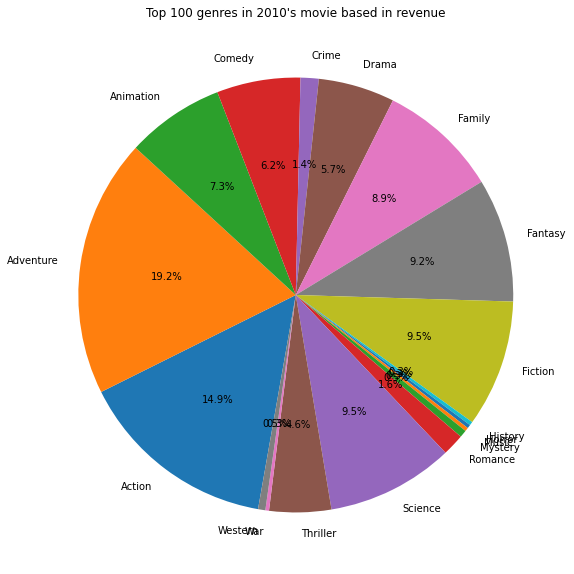

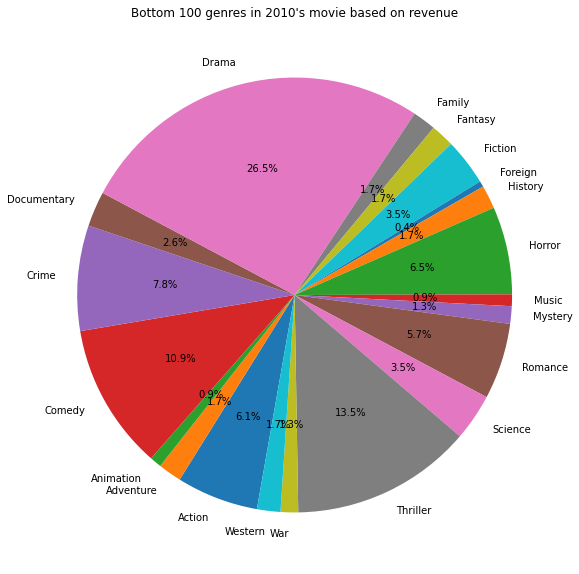

In [109]:
highest_revenue_movies = genre_2010.sort_values(by = 'revenue', ascending = False)[:100]
highest_revenue_movies = list(highest_revenue_movies["genres"])
text = " ".join([i for j in highest_revenue_movies for i in j])

wordCount = {} 
wordList = text.split()
word_freq_highest = pd.DataFrame( columns=['word', 'num'])
for word in wordList:
    wordCount[word] = wordCount.get(word, 0) + 1 
    keys = sorted(wordCount.keys())
 
for word in keys:
  word_freq_highest = word_freq_highest.append(pd.DataFrame([[word,wordCount[word]]], columns=['word', 'num']))

lowest_revenue_movies = genre_2010.sort_values(by = 'revenue', ascending = True)[:100]
lowest_revenue_movies = list(lowest_revenue_movies["genres"])
text = " ".join([i for j in lowest_revenue_movies for i in j])

wordCount = {} 
wordList = text.split()
word_freq_lowest = pd.DataFrame( columns=['word', 'num'])
for word in wordList:
    wordCount[word] = wordCount.get(word, 0) + 1 
    keys = sorted(wordCount.keys())
 
for word in keys:
  word_freq_lowest = word_freq_lowest.append(pd.DataFrame([[word,wordCount[word]]], columns=['word', 'num']))




plt.figure(figsize = (10,10))
plt.title("Top 100 genres in 2010's movie based in revenue")
plt.pie(word_freq_highest['num'], labels = word_freq_highest['word'], autopct='%.1f%%', startangle=260, counterclock=False)
plt.show()


plt.figure(figsize = (10,10))
plt.title("Bottom 100 genres in 2010's movie based on revenue")
plt.pie(word_freq_lowest['num'], labels = word_freq_lowest['word'], autopct='%.1f%%', startangle=260, counterclock=False)
plt.show()

#correlation

In [110]:
data_continuous = data_with_revenue[['revenue','budget','popularity','runtime','vote_average','vote_count','num_of_genres', 'num_of_keywords','num_of_production_companies','num_of_production_countries','num_of_spoken_languages','num_of_cast','num_of_crew' ]]

transformer = MinMaxScaler()

transformer.fit(data_continuous)
data_continuous[:] = transformer.fit_transform(data_continuous[:])
data_continuous

#result
data_continuous



revenue    budget  ...  num_of_cast  num_of_crew
0     1.000000  0.623684  ...     0.370536     0.351724
1     0.344696  0.789474  ...     0.151786     0.073563
2     0.315884  0.644737  ...     0.370536     0.356322
3     0.389151  0.657895  ...     0.705357     0.498851
4     0.101916  0.684211  ...     0.120536     0.303448
...        ...       ...  ...          ...          ...
4775  0.000028  0.000000  ...     0.066964     0.006897
4788  0.002152  0.000032  ...     0.049107     0.016092
4792  0.000036  0.000053  ...     0.066964     0.004598
4796  0.000152  0.000018  ...     0.084821     0.013793
4798  0.000732  0.000579  ...     0.031250     0.025287

[3376 rows x 13 columns]

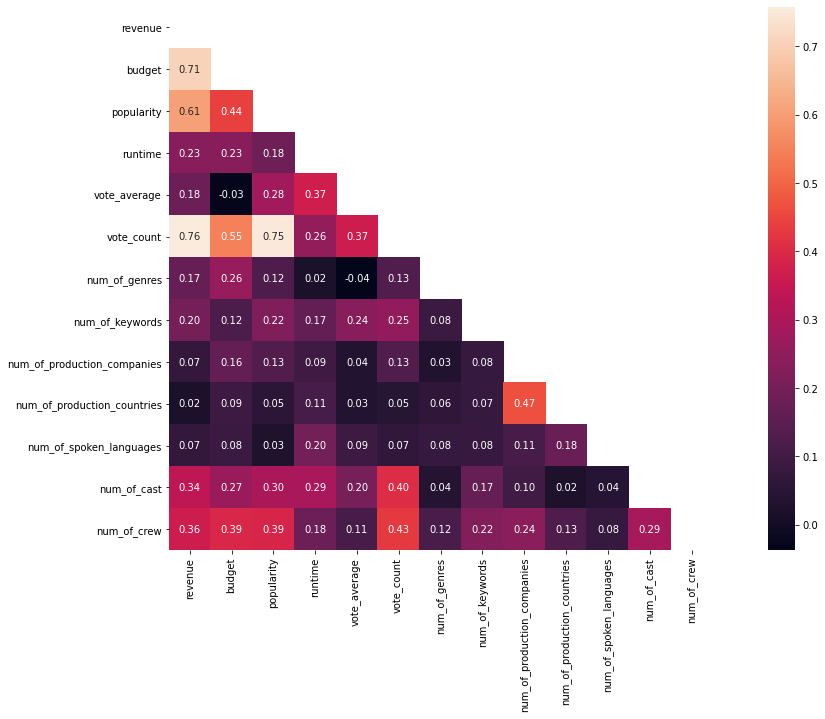

In [111]:
data_continuous_before_norm = data_with_revenue[['revenue','budget','popularity','runtime','vote_average','vote_count','num_of_genres', 'num_of_keywords','num_of_production_companies','num_of_production_countries','num_of_spoken_languages','num_of_cast','num_of_crew' ]]
# corr = data_continuous_before_norm.corr(method = 'pearson')
# corr

corr = data_continuous.corr(method = 'pearson')

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True,mask = mask , fmt=".2f",square = True, linecolor = "white")


In [112]:
data_continuous_before_norm

revenue     budget  ...  num_of_cast  num_of_crew
0     2787965087  237000000  ...           83          153
1      961000000  300000000  ...           34           32
2      880674609  245000000  ...           83          155
3     1084939099  250000000  ...          158          217
4      284139100  260000000  ...           27          132
...          ...        ...  ...          ...          ...
4775       76901          0  ...           15            3
4788     6000000      12000  ...           11            7
4792       99000      20000  ...           15            2
4796      424760       7000  ...           19            6
4798     2040920     220000  ...            7           11

[3376 rows x 13 columns]

Text(0.5, 1.0, 'Scatter plot between revenue and num_of_spoken_languages')

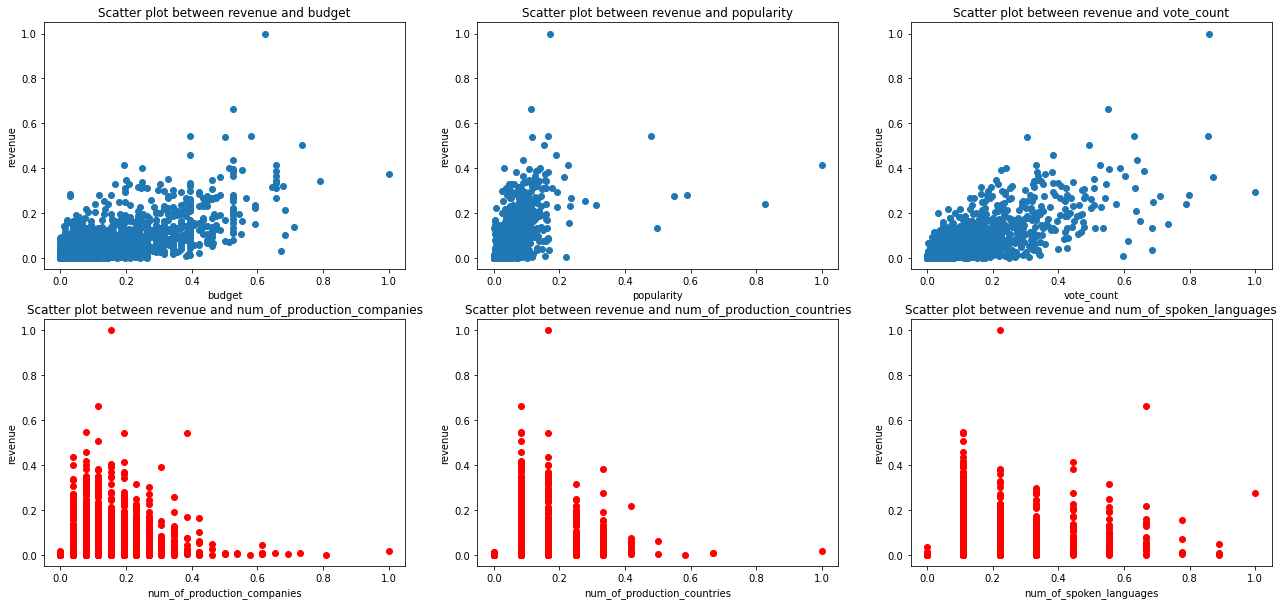

In [113]:
#Top 3 correlated variables with revenue
fig = plt.figure(figsize=(22, 10)) 
plt.subplot(2,3,1).scatter(x = data_continuous['budget'], y = data_continuous['revenue']) 
plt.xlabel("budget") 
plt.ylabel("revenue") 
plt.title('Scatter plot between revenue and budget')

plt.subplot(2,3,2).scatter(x = data_continuous['popularity'], y =data_continuous['revenue']) 
plt.xlabel("popularity") 
plt.ylabel("revenue") 
plt.title('Scatter plot between revenue and popularity')

plt.subplot(2,3,3).scatter(x = data_continuous['vote_count'], y =data_continuous['revenue']) 
plt.xlabel("vote_count")
plt.ylabel("revenue") 
plt.title('Scatter plot between revenue and vote_count')

#Bottom 3 correlated variables with revenue
plt.subplot(2,3,4).scatter(x = data_continuous['num_of_production_companies'], y = data_continuous['revenue'],c = 'red') 
plt.xlabel("num_of_production_companies") 
plt.ylabel("revenue") 
plt.title('Scatter plot between revenue and num_of_production_companies')

plt.subplot(2,3,5).scatter(x = data_continuous['num_of_production_countries'], y =data_continuous['revenue'],c = 'red') 
plt.xlabel("num_of_production_countries") 
plt.ylabel("revenue") 
plt.title('Scatter plot between revenue and num_of_production_countries')

plt.subplot(2,3,6).scatter(x = data_continuous['num_of_spoken_languages'], y =data_continuous['revenue'],c = 'red') 
plt.xlabel("num_of_spoken_languages")
plt.ylabel("revenue") 
plt.title('Scatter plot between revenue and num_of_spoken_languages')

Text(0.5, 1.0, 'Scatter plot between revenue and vote_count')

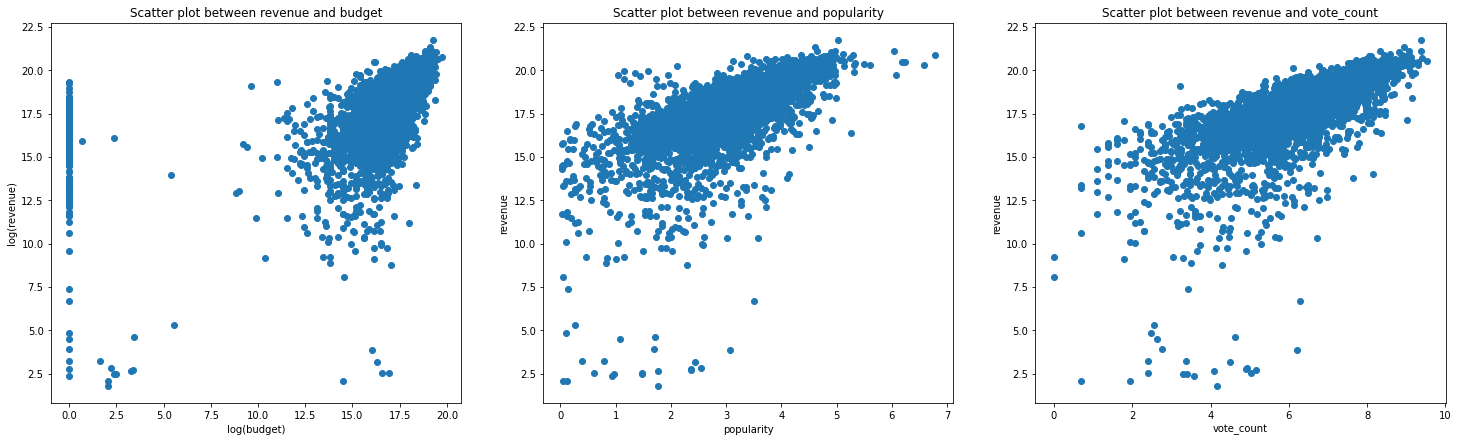

In [114]:
#Top 3 correlated variables with revenue with logarithm
fig = plt.figure(figsize=(25, 7)) 
plt.subplot(1,3,1).scatter(np.log1p(data_continuous_before_norm['budget']), np.log1p(data_continuous_before_norm['revenue'])) 
plt.xlabel("log(budget)") 
plt.ylabel("log(revenue)") 
plt.title('Scatter plot between revenue and budget')

plt.subplot(1,3,2).scatter(x = np.log1p(data_continuous_before_norm['popularity']), y =np.log1p(data_continuous_before_norm['revenue'])) 
plt.xlabel("popularity") 
plt.ylabel("revenue") 
plt.title('Scatter plot between revenue and popularity')

plt.subplot(1,3,3).scatter(x = np.log1p(data_continuous_before_norm['vote_count']), y =np.log1p(data_continuous_before_norm['revenue'])) 
plt.xlabel("vote_count")
plt.ylabel("revenue") 
plt.title('Scatter plot between revenue and vote_count')


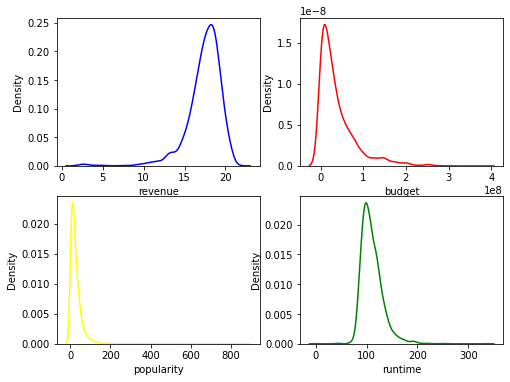

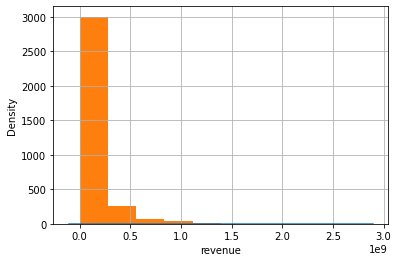

In [133]:
f, axes = plt.subplots(2, 2, figsize=(8, 6))

sns.kdeplot(np.log1p(data_continuous_before_norm["revenue"]), color="blue", ax=axes[0, 0])

sns.kdeplot(data_continuous_before_norm["budget"], color="red", ax=axes[0, 1])

sns.kdeplot(data_continuous_before_norm["popularity"], color="yellow", ax=axes[1, 0])

sns.kdeplot(data_continuous_before_norm["runtime"], color="green", ax=axes[1, 1])

plt.show()

sns.kdeplot(data_continuous_before_norm['revenue'])
scipy.stats.skew(data_continuous_before_norm['revenue'])
data_continuous_before_norm['revenue'].hist()




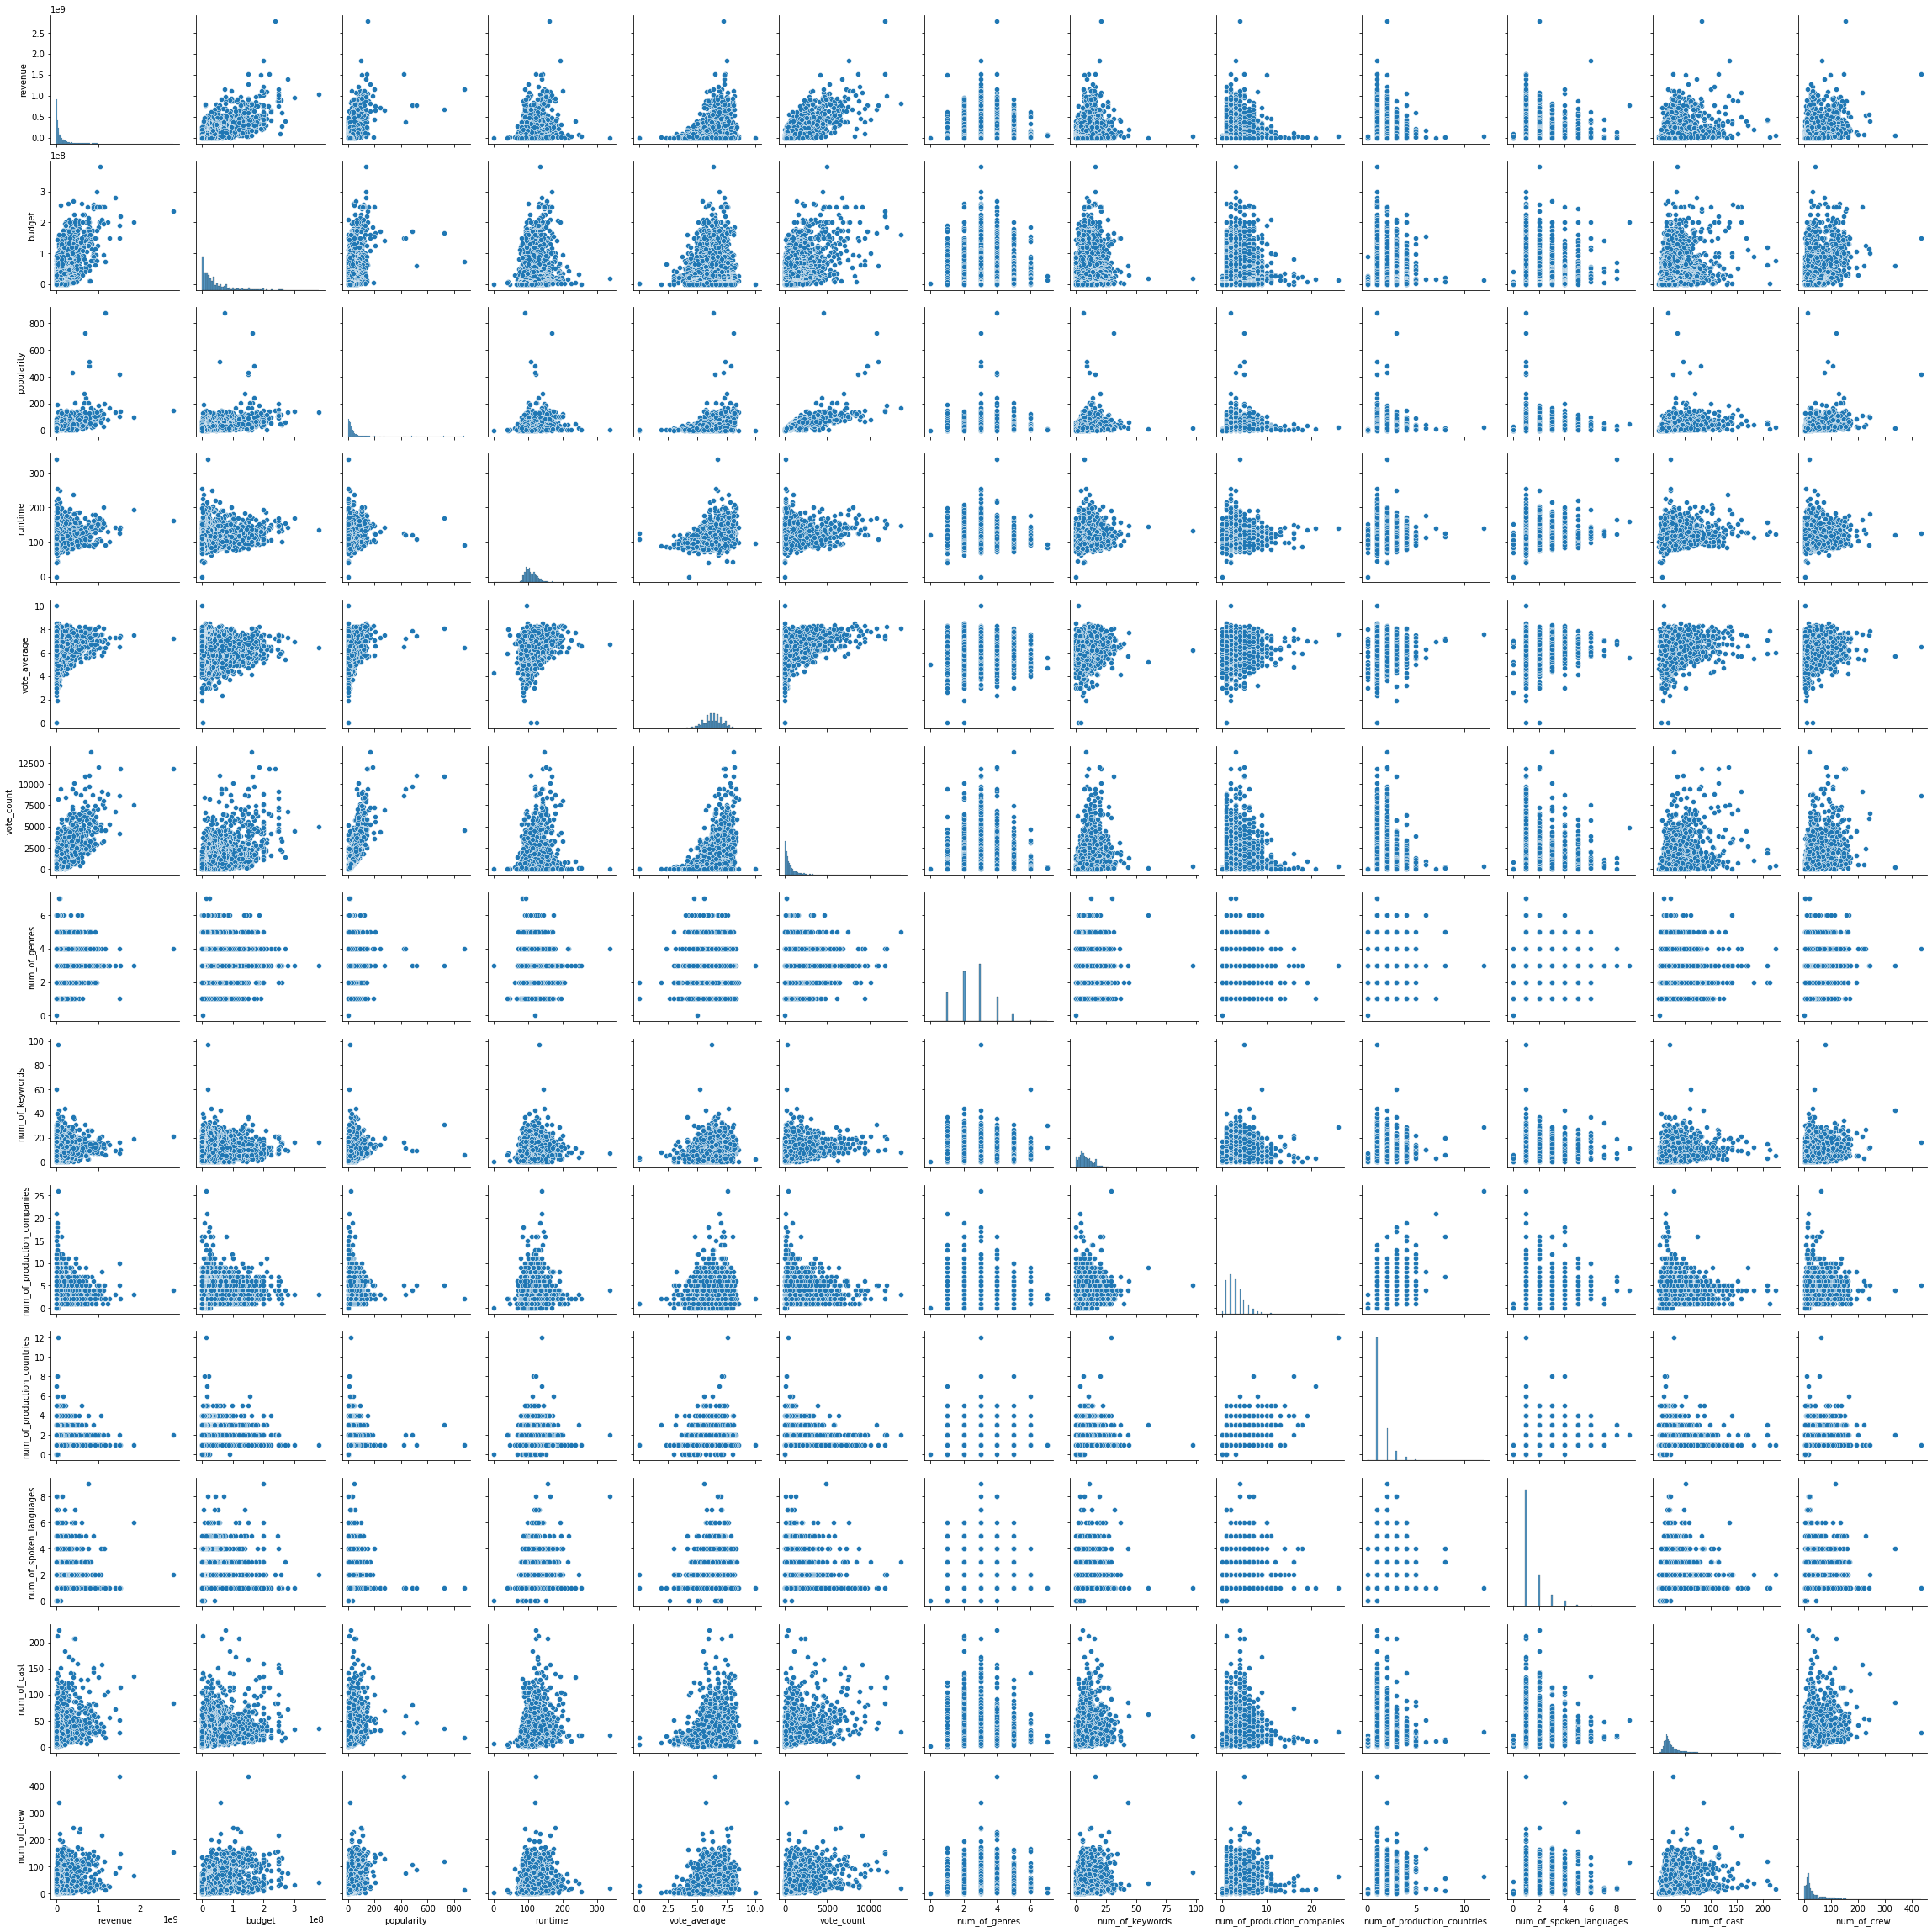

In [119]:
sns.pairplot(data_continuous_before_norm)


plt.show()


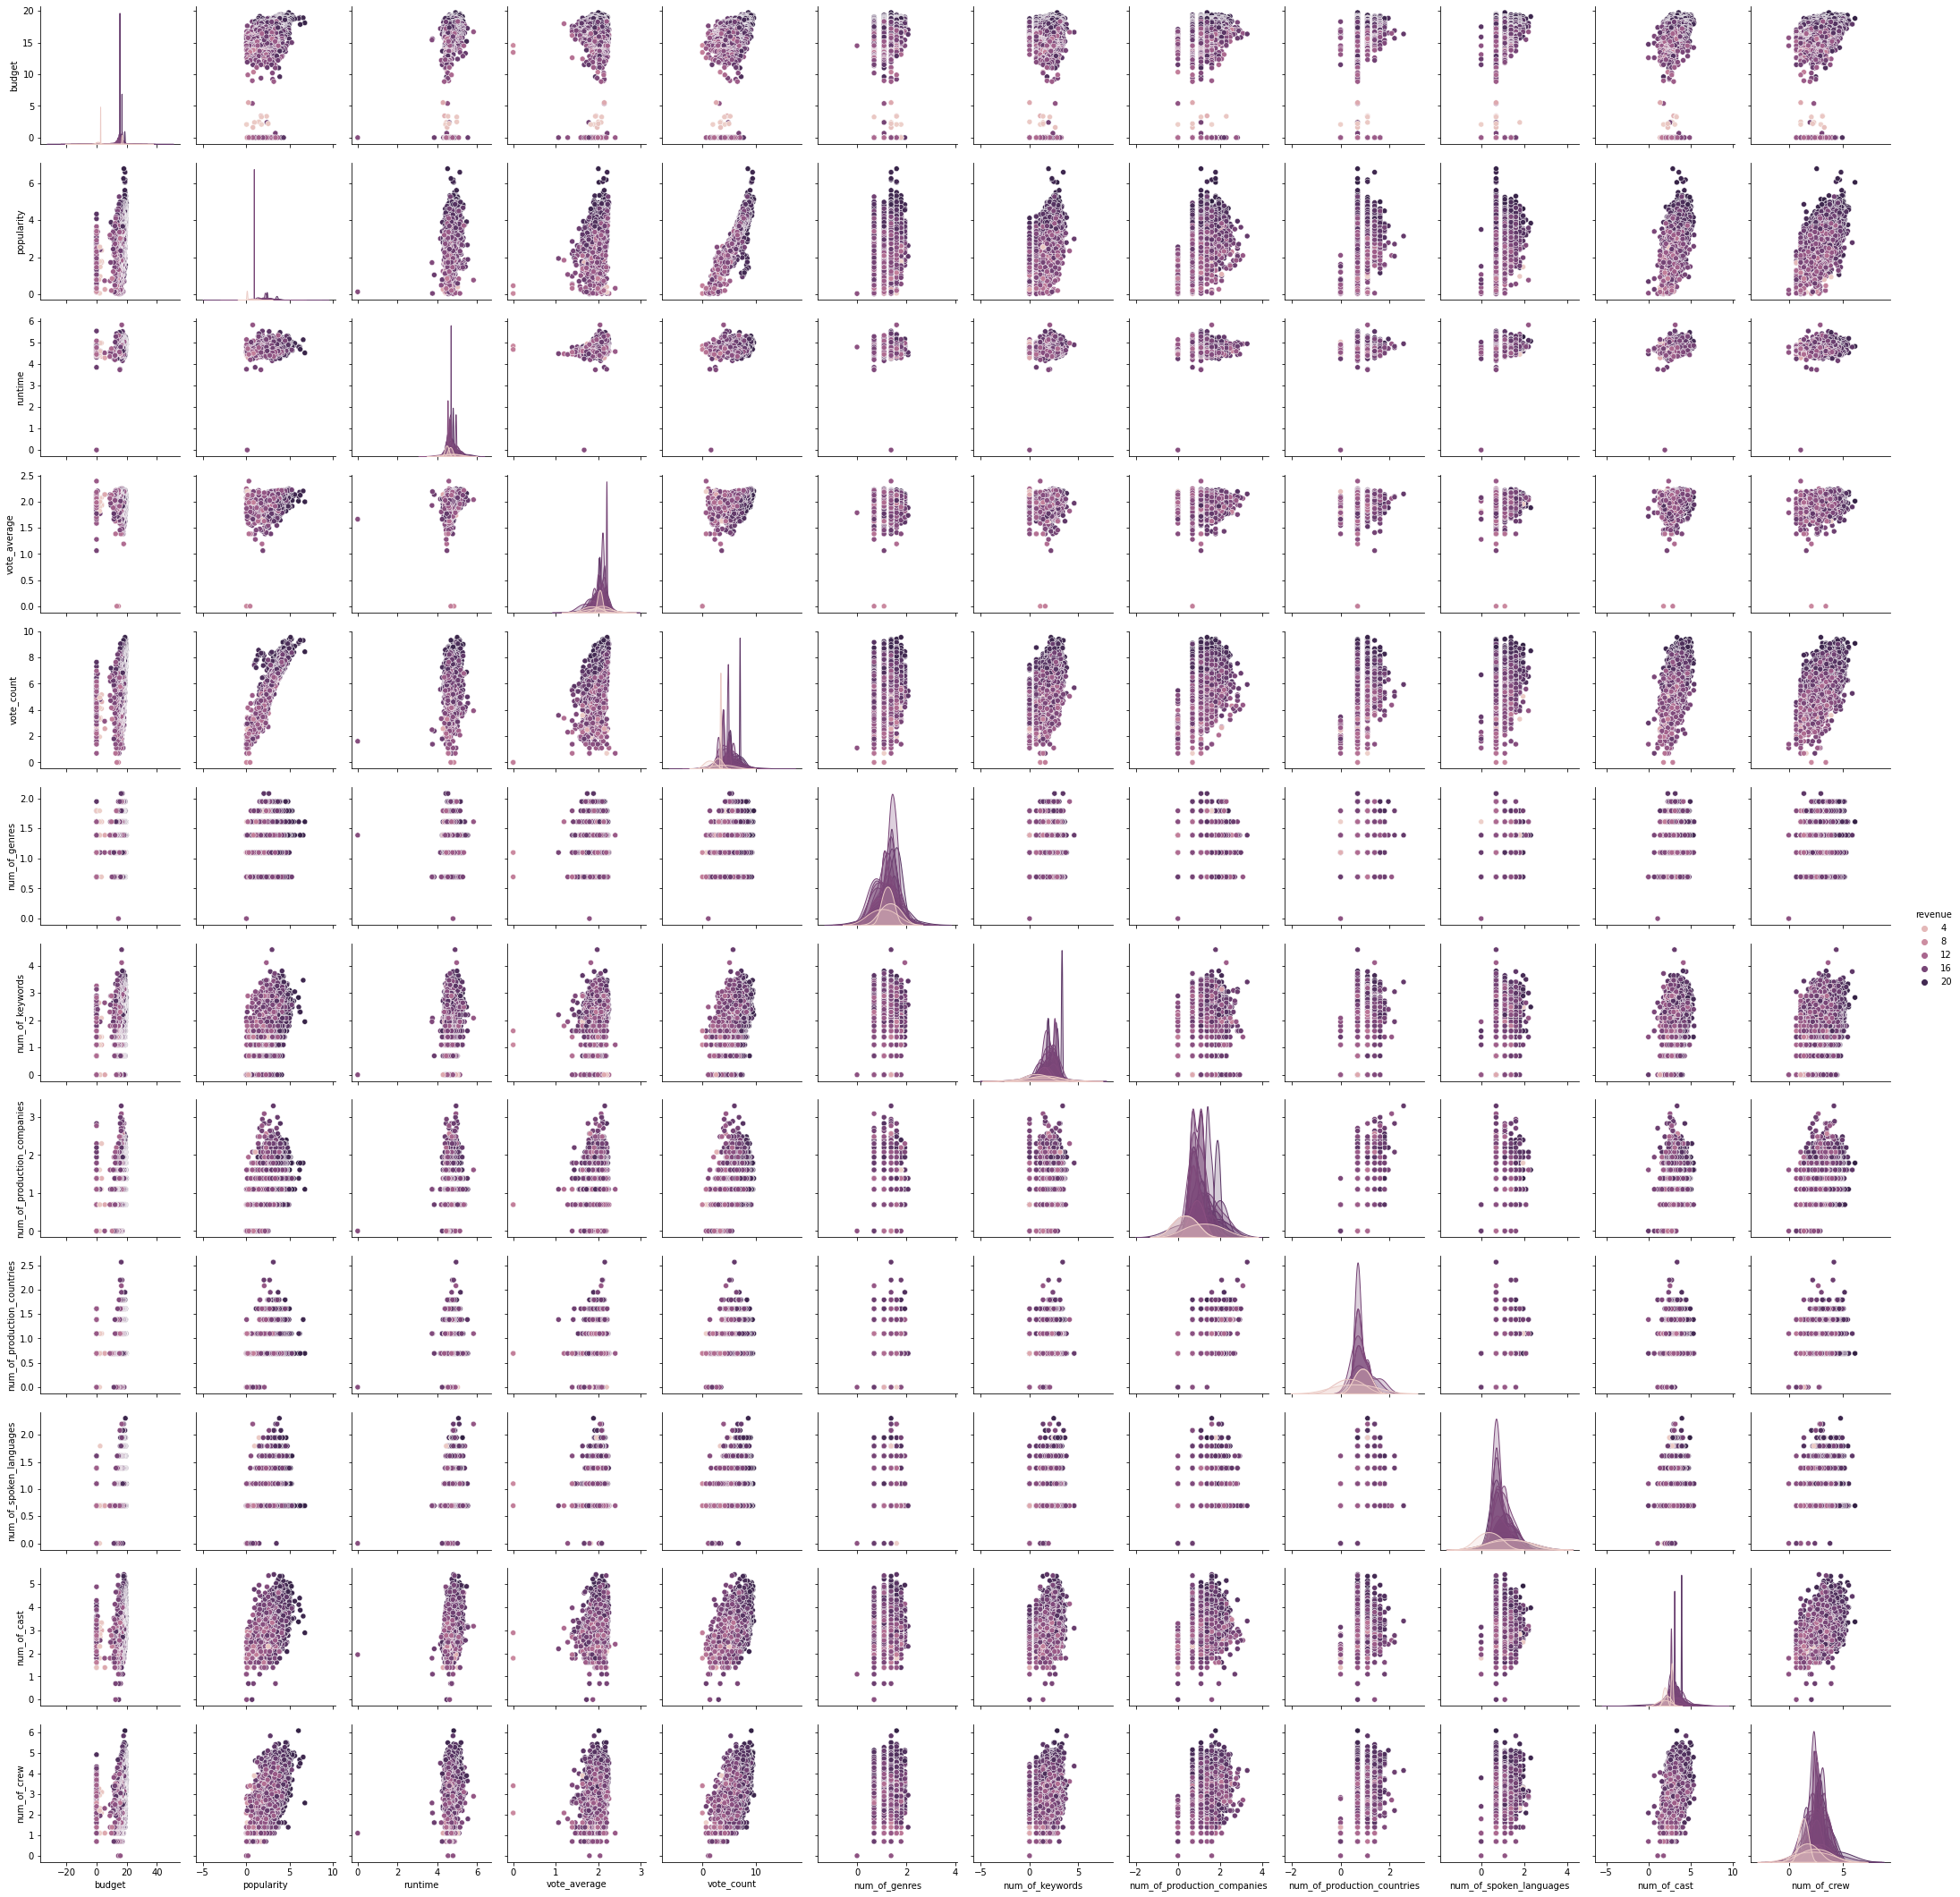

In [319]:
sns.pairplot(np.log1p(data_continuous_before_norm), hue="revenue")


plt.show()


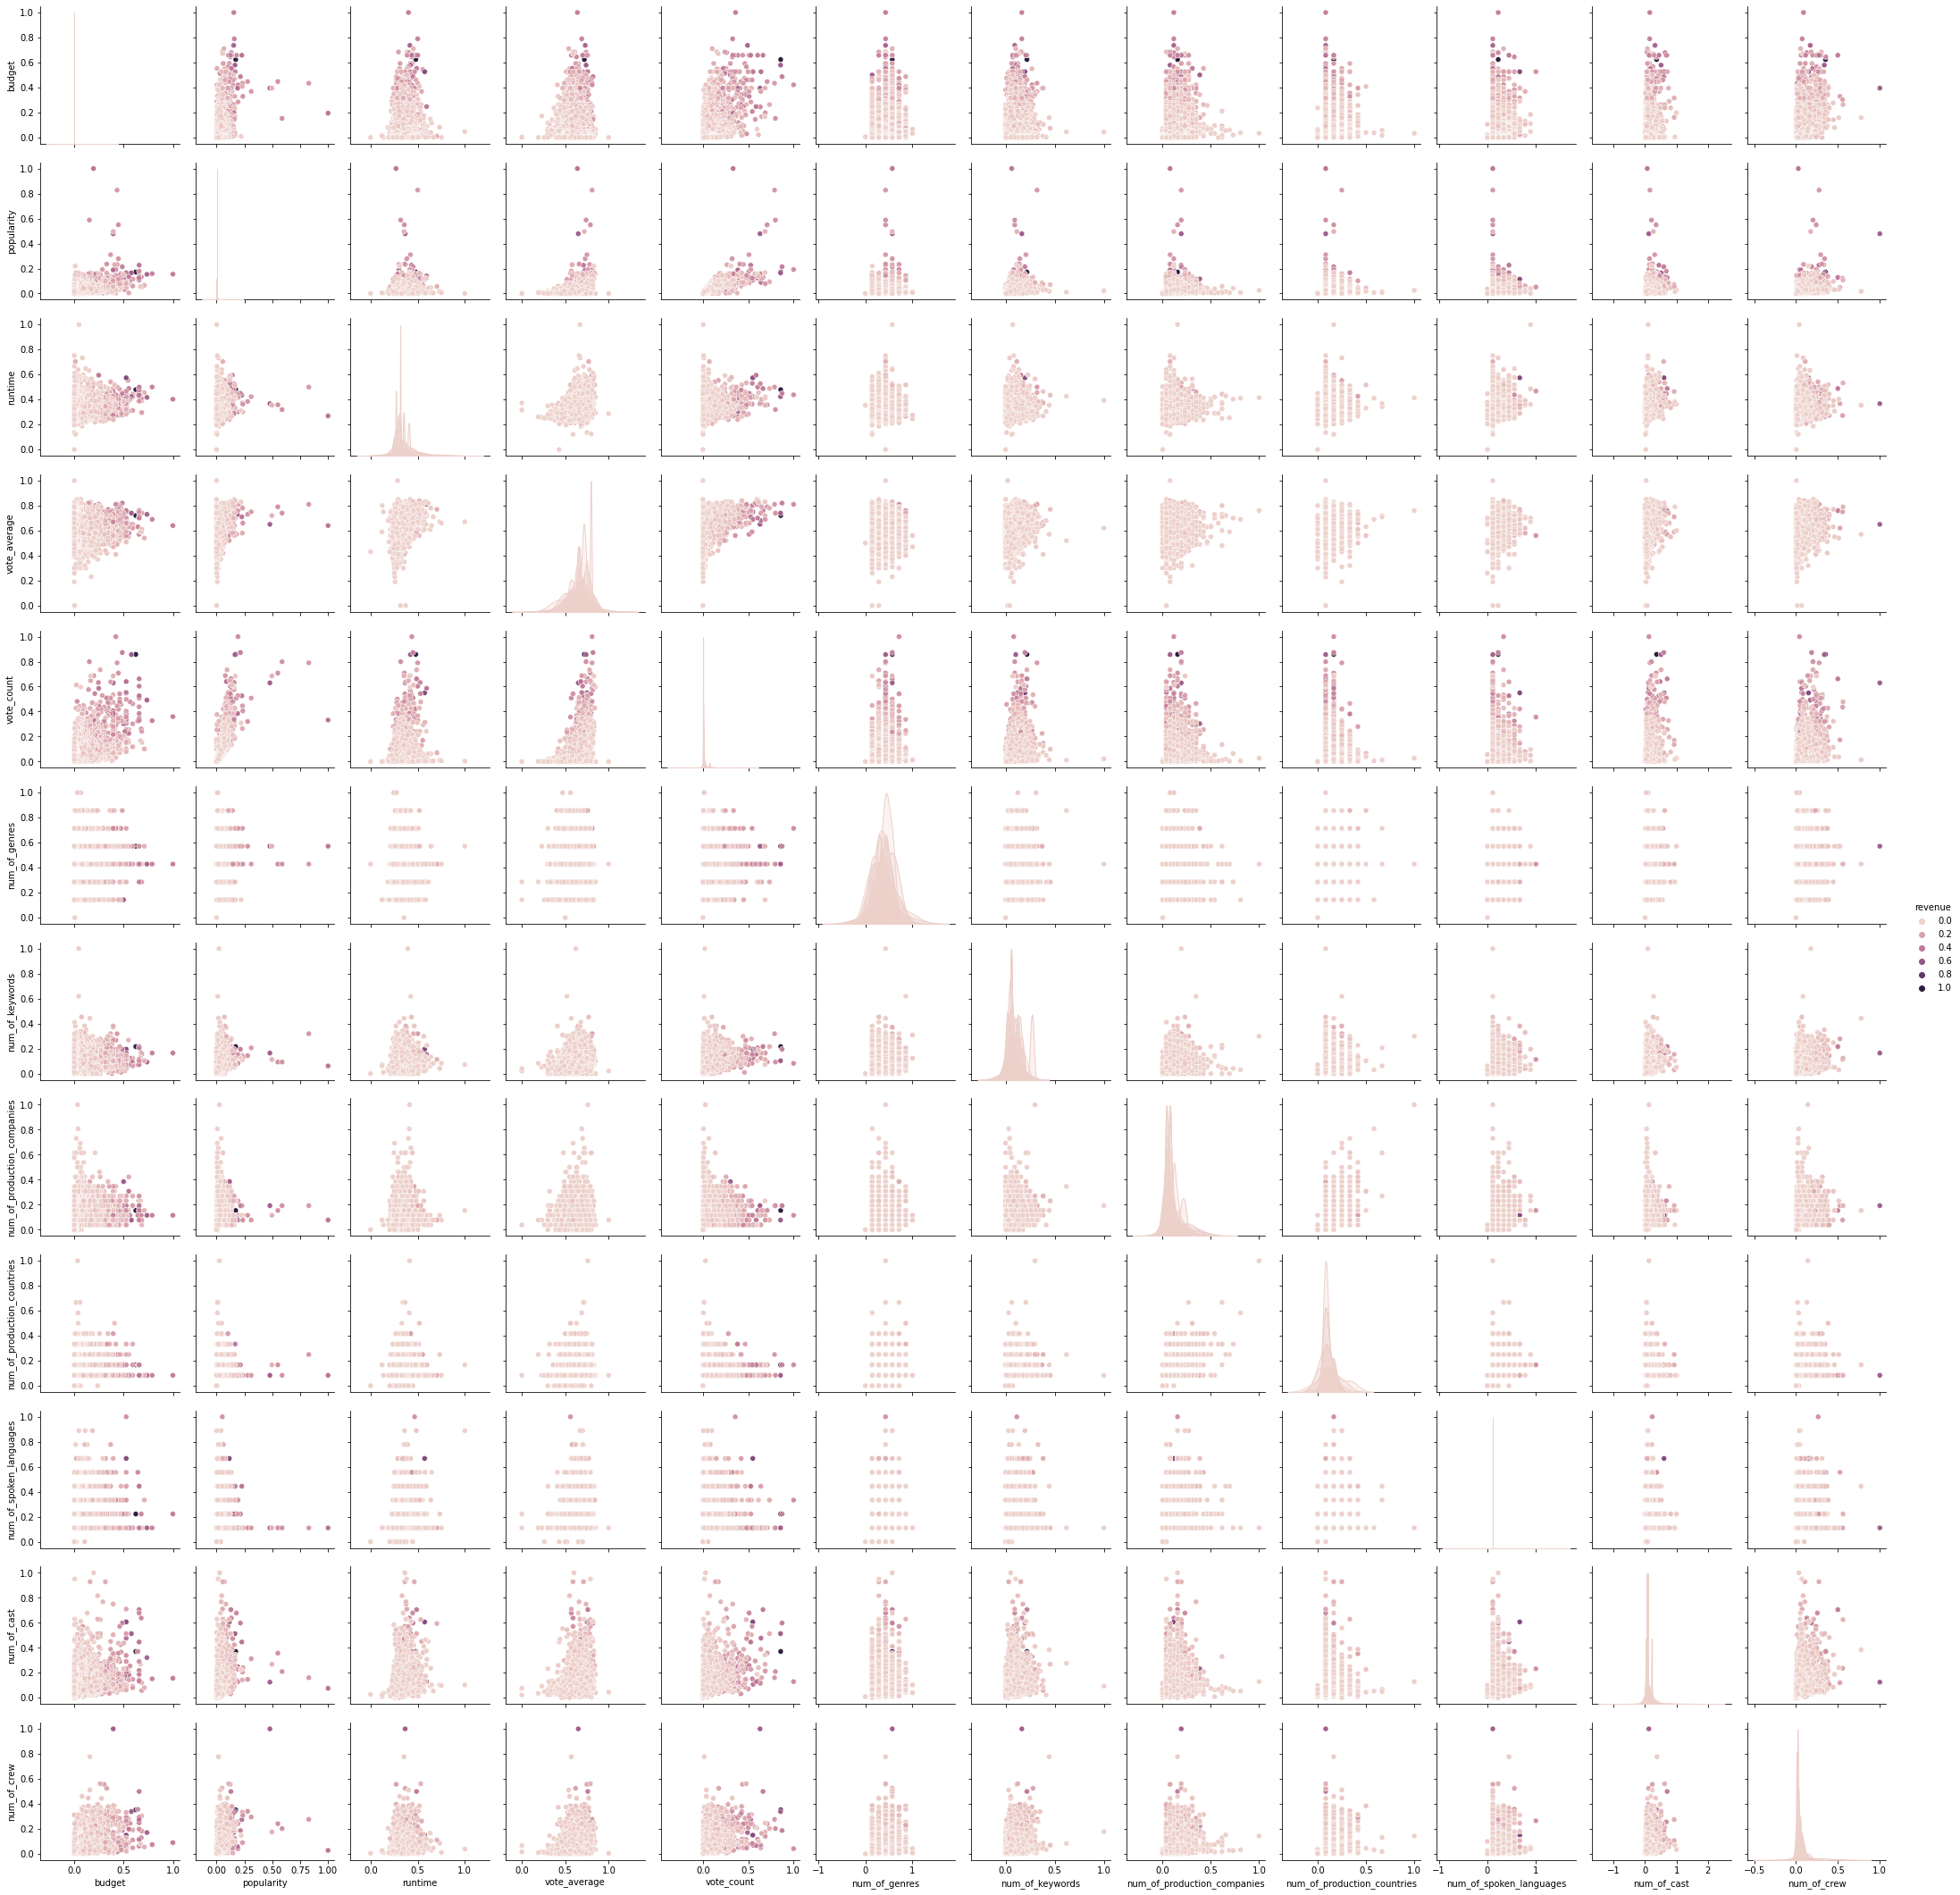

In [320]:
sns.pairplot(data_continuous, hue="revenue")


plt.show()


#Regression


3.883574308677458

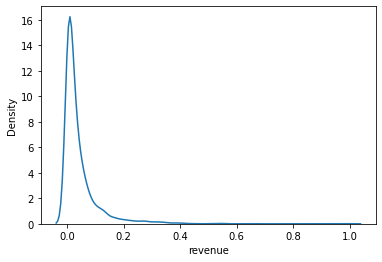

In [321]:
sns.kdeplot(data_continuous['revenue'])
scipy.stats.skew(data_continuous['revenue'])


3.883574308677457

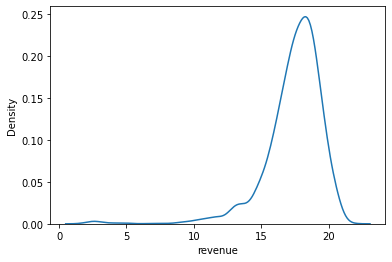

In [309]:
sns.kdeplot(np.log1p(data_continuous_before_norm['revenue']))
scipy.stats.skew(data_continuous_before_norm['revenue'])

In [332]:
def get_model1(seed):
    df_train, df_test = train_test_split(data_continuous, test_size=0.3, random_state=seed)
    model = sm.OLS.from_formula("revenue ~  budget +	popularity +runtime	+ vote_average	+ vote_count	+ num_of_genres	+ num_of_keywords +	num_of_production_companies	+ num_of_production_countries	+ num_of_spoken_languages	+ num_of_cast	+ num_of_crew", data=df_train)
    return df_train, df_test, model.fit()


df_train, df_test, result1 = get_model1(3)
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     491.7
Date:                Sun, 27 Jun 2021   Prob (F-statistic):               0.00
Time:                        12:54:49   Log-Likelihood:                 4650.6
No. Observations:                2363   AIC:                            -9275.
Df Residuals:                    2350   BIC:                            -9200.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [333]:
def get_model2(seed):
    df_train, df_test = train_test_split(data_continuous, test_size=0.3, random_state=seed)
    model = sm.OLS.from_formula("revenue ~  budget +	popularity	+ vote_average	+ vote_count	+ num_of_genres	+ num_of_keywords +	num_of_production_companies	+ num_of_production_countries	+ num_of_spoken_languages	+ num_of_cast	+ num_of_crew", data=df_train)
    return df_train, df_test, model.fit()


df_train, df_test, result1 = get_model2(3)
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     536.6
Date:                Sun, 27 Jun 2021   Prob (F-statistic):               0.00
Time:                        12:59:57   Log-Likelihood:                 4650.6
No. Observations:                2363   AIC:                            -9277.
Df Residuals:                    2351   BIC:                            -9208.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [335]:
def get_model3(seed):
    df_train, df_test = train_test_split(data_continuous, test_size=0.3, random_state=seed)
    model = sm.OLS.from_formula("revenue ~  budget +	popularity	+ vote_average	+ vote_count	+ num_of_keywords +	num_of_production_companies	+ num_of_production_countries	+ num_of_spoken_languages	+ num_of_cast	+ num_of_crew", data=df_train)
    return df_train, df_test, model.fit()


df_train, df_test, result1 = get_model3(3)
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     590.3
Date:                Sun, 27 Jun 2021   Prob (F-statistic):               0.00
Time:                        13:00:44   Log-Likelihood:                 4650.4
No. Observations:                2363   AIC:                            -9279.
Df Residuals:                    2352   BIC:                            -9215.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [336]:
def get_model4(seed):
    df_train, df_test = train_test_split(data_continuous, test_size=0.3, random_state=seed)
    model = sm.OLS.from_formula("revenue ~  budget +	popularity	+ vote_average	+ vote_count	+ num_of_keywords +	num_of_production_companies	+ num_of_production_countries		+ num_of_cast	+ num_of_crew", data=df_train)
    return df_train, df_test, model.fit()


df_train, df_test, result1 = get_model4(3)
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     656.2
Date:                Sun, 27 Jun 2021   Prob (F-statistic):               0.00
Time:                        13:01:40   Log-Likelihood:                 4650.3
No. Observations:                2363   AIC:                            -9281.
Df Residuals:                    2353   BIC:                            -9223.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [339]:
def get_model5(seed):
    df_train, df_test = train_test_split(data_continuous, test_size=0.3, random_state=seed)
    model = sm.OLS.from_formula("revenue ~  budget +	popularity	+ vote_count	+ num_of_keywords +	num_of_production_companies	+ num_of_production_countries		+ num_of_cast	+ num_of_crew", data=df_train)
    return df_train, df_test, model.fit()


df_train, df_test, result1 = get_model5(3)
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     738.3
Date:                Sun, 27 Jun 2021   Prob (F-statistic):               0.00
Time:                        13:03:34   Log-Likelihood:                 4650.1
No. Observations:                2363   AIC:                            -9282.
Df Residuals:                    2354   BIC:                            -9230.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [341]:
def get_model6(seed):
    df_train, df_test = train_test_split(data_continuous, test_size=0.3, random_state=seed)
    model = sm.OLS.from_formula("revenue ~  budget +	popularity	+ vote_count	+ num_of_keywords +	num_of_production_companies		+ num_of_cast	+ num_of_crew", data=df_train)
    return df_train, df_test, model.fit()


df_train, df_test, result1 = get_model6(3)
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     843.7
Date:                Sun, 27 Jun 2021   Prob (F-statistic):               0.00
Time:                        13:04:03   Log-Likelihood:                 4649.7
No. Observations:                2363   AIC:                            -9283.
Df Residuals:                    2355   BIC:                            -9237.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [342]:
def get_model7(seed):
    df_train, df_test = train_test_split(data_continuous, test_size=0.3, random_state=seed)
    model = sm.OLS.from_formula("revenue ~  budget +	popularity	+ vote_count	+ num_of_keywords +	num_of_production_companies		+ num_of_crew", data=df_train)
    return df_train, df_test, model.fit()


df_train, df_test, result1 = get_model7(3)
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     983.7
Date:                Sun, 27 Jun 2021   Prob (F-statistic):               0.00
Time:                        13:04:40   Log-Likelihood:                 4648.8
No. Observations:                2363   AIC:                            -9284.
Df Residuals:                    2356   BIC:                            -9243.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [28]:
def get_model8(seed):
    df_train, df_test = train_test_split(data_continuous, test_size=0.3, random_state=seed)
    model = sm.OLS.from_formula("revenue ~  budget +	popularity	+ vote_count +	num_of_production_companies		+ num_of_crew", data=df_train)
    return df_train, df_test, model.fit()


df_train, df_test, result1 = get_model8(3)
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     1178.
Date:                Mon, 28 Jun 2021   Prob (F-statistic):               0.00
Time:                        09:41:01   Log-Likelihood:                 4647.0
No. Observations:                2363   AIC:                            -9282.
Df Residuals:                    2357   BIC:                            -9247.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [29]:
print(result1.pvalues)

Intercept                       9.057249e-01
budget                         3.154908e-196
popularity                      1.776049e-13
vote_count                     4.378086e-127
num_of_production_companies     5.807716e-09
num_of_crew                     9.167599e-03
dtype: float64


In [30]:
def get_model8(seed):
    df_train, df_test = train_test_split(data_continuous, test_size=0.3, random_state=seed)
    model = sm.OLS.from_formula("revenue ~  budget +	popularity	+ vote_count ", data=df_train)
    return df_train, df_test, model.fit()


df_train, df_test, result1 = get_model8(3)
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     1912.
Date:                Mon, 28 Jun 2021   Prob (F-statistic):               0.00
Time:                        09:44:23   Log-Likelihood:                 4623.5
No. Observations:                2363   AIC:                            -9239.
Df Residuals:                    2359   BIC:                            -9216.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0063      0.001     -6.332      0.0

In [44]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# y,x = dmatrices("revenue ~  budget +	popularity	+ vote_count ", data=df_train, return_type = "dataframe")
y,x = dmatrices("revenue ~  budget +	popularity +runtime	+ vote_average	+ vote_count	+ num_of_genres	+ num_of_keywords +	num_of_production_companies	+ num_of_production_countries	+ num_of_spoken_languages	+ num_of_cast	+ num_of_crew", data=df_train, return_type = "dataframe")

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns

vif.round(1)

VIF Factor                     features
0         78.3                    Intercept
1          1.8                       budget
2          2.1                   popularity
3          1.3                      runtime
4          1.5                 vote_average
5          3.0                   vote_count
6          1.1                num_of_genres
7          1.1              num_of_keywords
8          1.4  num_of_production_companies
9          1.4  num_of_production_countries
10         1.1      num_of_spoken_languages
11         1.2                  num_of_cast
12         1.3                  num_of_crew

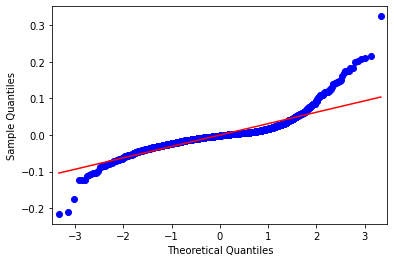

In [45]:
qq = sm.qqplot(result1.resid, line = 'r')
plt.show()

In [46]:
data_with_log = np.log1p(data_continuous_before_norm)


In [55]:
data_log_norm = data_with_log[['revenue','budget','popularity','runtime','vote_average','vote_count','num_of_genres', 'num_of_keywords','num_of_production_companies','num_of_production_countries','num_of_spoken_languages','num_of_cast','num_of_crew' ]]

transformer = MinMaxScaler()

transformer.fit(data_log_norm)
data_log_norm[:] = transformer.fit_transform(data_log_norm[:])
data_log_norm

#result
data_log_norm



revenue    budget  ...  num_of_cast  num_of_crew
0     1.000000  0.976103  ...     0.818082     0.828768
1     0.946630  0.988034  ...     0.656441     0.575307
2     0.942256  0.977783  ...     0.818082     0.830891
3     0.952708  0.978806  ...     0.935896     0.885951
4     0.885573  0.980791  ...     0.615241     0.804646
...        ...       ...  ...          ...          ...
4775  0.473950  0.000000  ...     0.511916     0.228097
4788  0.692270  0.475445  ...     0.458800     0.342146
4792  0.486607  0.501301  ...     0.511916     0.180763
4796  0.559584  0.448165  ...     0.553116     0.320175
4798  0.638236  0.622676  ...     0.383937     0.408860

[3376 rows x 13 columns]

In [60]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# y,x = dmatrices("revenue ~  budget +	popularity	+ vote_count ", data=df_train, return_type = "dataframe")
y,x = dmatrices("revenue ~  budget +	popularity +runtime	+ vote_average	+ vote_count	+ num_of_genres	+ num_of_keywords +	num_of_production_companies	+ num_of_production_countries	+ num_of_spoken_languages	+ num_of_cast	+ num_of_crew", data=data_log_norm, return_type = "dataframe")

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns

vif.round(1)

VIF Factor                     features
0        700.1                    Intercept
1          1.2                       budget
2          7.9                   popularity
3          1.3                      runtime
4          1.4                 vote_average
5          8.8                   vote_count
6          1.1                num_of_genres
7          1.3              num_of_keywords
8          1.4  num_of_production_companies
9          1.3  num_of_production_countries
10         1.1      num_of_spoken_languages
11         1.4                  num_of_cast
12         1.7                  num_of_crew

In [57]:
def get_model8(seed):
    df_train, df_test = train_test_split(data_log_norm, test_size=0.3, random_state=seed)
    model = sm.OLS.from_formula("revenue ~  budget +	popularity +runtime	+ vote_average	+ vote_count	+ num_of_genres	+ num_of_keywords +	num_of_production_companies	+ num_of_production_countries	+ num_of_spoken_languages	+ num_of_cast	+ num_of_crew", data=df_train)
    return df_train, df_test, model.fit()


df_train, df_test, result1 = get_model8(3)
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     203.0
Date:                Mon, 28 Jun 2021   Prob (F-statistic):               0.00
Time:                        10:15:50   Log-Likelihood:                 2633.2
No. Observations:                2363   AIC:                            -5240.
Df Residuals:                    2350   BIC:                            -5165.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [63]:
def get_model8(seed):
    df_train, df_test = train_test_split(data_log_norm, test_size=0.3, random_state=seed)
    model = sm.OLS.from_formula("revenue ~  budget +runtime	+ vote_average	+ vote_count	+ num_of_production_companies		+ num_of_cast	", data=df_train)
    return df_train, df_test, model.fit()


df_train, df_test, result1 = get_model8(3)
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     404.1
Date:                Mon, 28 Jun 2021   Prob (F-statistic):               0.00
Time:                        10:18:38   Log-Likelihood:                 2629.0
No. Observations:                2363   AIC:                            -5244.
Df Residuals:                    2356   BIC:                            -5204.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [64]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# y,x = dmatrices("revenue ~  budget +	popularity	+ vote_count ", data=df_train, return_type = "dataframe")
y,x = dmatrices("revenue ~  budget  +runtime	+ vote_average	+ vote_count	+	num_of_production_companies+ num_of_cast", data=data_log_norm, return_type = "dataframe")

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns

vif.round(1)

VIF Factor                     features
0       671.0                    Intercept
1         1.2                       budget
2         1.2                      runtime
3         1.3                 vote_average
4         1.8                   vote_count
5         1.1  num_of_production_companies
6         1.4                  num_of_cast

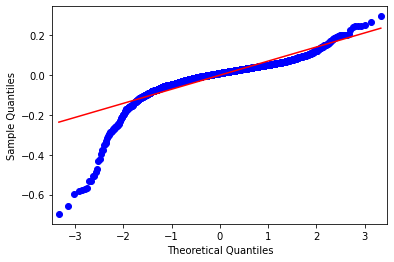

In [65]:
qq = sm.qqplot(result1.resid, line = 'r')
plt.show()

In [52]:
def get_model8(seed):
    df_train, df_test = train_test_split(data_with_log, test_size=0.3, random_state=seed)
    model = sm.OLS.from_formula("revenue ~  budget +	popularity +runtime	+ vote_average	+ vote_count ", data=df_train)
    return df_train, df_test, model.fit()


df_train, df_test, result1 = get_model8(3)
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     475.6
Date:                Mon, 28 Jun 2021   Prob (F-statistic):               0.00
Time:                        10:13:27   Log-Likelihood:                -4456.7
No. Observations:                2363   AIC:                             8925.
Df Residuals:                    2357   BIC:                             8960.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        7.8229      0.917      8.528   